In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import io
df_cases=pd.read_csv('CasosPositivosCOVID-19_7Enero.csv',dtype={ 
                                                                'ID de caso':str,
                                                                'Código DIVIPOLA departamento':str,
                                                                'Nombre departamento':str,    
                                                                'Código DIVIPOLA municipio':str,    
                                                                'Nombre municipio':str,         
                                                                'Edad':int,        
                                                                'Unidad de medida de edad':str,     
                                                                'Sexo':str,     
                                                                'Código ISO del país':str,    
                                                                'Nombre del país':str,    
                                                                'Recuperado':str,    
                                                                'Tipo de recuperación':str,       
                                                                'Pertenencia étnica':str,       
                                                                'Nombre del grupo étnico':str
                                                                },low_memory=False)
"""
Debido a que el dataset proviene de mas de cerca de los 1102 municipios del país 
cada uno con sus propias fuentes de información, como lo son EPS IPS y entidades municipales
el sistema manifiesta que se presentan diferentes tipos de configuracion de variables,
por lo que procedemos a generar el tipo de columna encerrado dentro del diccionario dtype{:} 
"""
#Visualizamos el dataset                                                                
df_cases.head()

,fecha reporte web,ID de caso,Fecha de notificación,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,...,Código ISO del país,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
0,6/3/2020 0:00:00,1,2/3/2020 0:00:00,11,BOGOTA,"11,001",BOGOTA,19,1,F,...,380,ITALIA,Recuperado,27/2/2020 0:00:00,NaN,6/3/2020 0:00:00,13/3/2020 0:00:00,PCR,6,NaN
1,9/3/2020 0:00:00,2,6/3/2020 0:00:00,76,VALLE,"76,111",BUGA,34,1,M,...,724,ESPAÑA,Recuperado,4/3/2020 0:00:00,NaN,9/3/2020 0:00:00,19/3/2020 0:00:00,PCR,5,NaN
2,9/3/2020 0:00:00,3,7/3/2020 0:00:00,5,ANTIOQUIA,"5,001",MEDELLIN,50,1,F,...,724,ESPAÑA,Recuperado,29/2/2020 0:00:00,NaN,9/3/2020 0:00:00,15/3/2020 0:00:00,PCR,6,NaN
3,11/3/2020 0:00:00,4,9/3/2020 0:00:00,5,ANTIOQUIA,"5,001",MEDELLIN,55,1,M,...,NaN,NaN,Recuperado,6/3/2020 0:00:00,NaN,11/3/2020 0:00:00,26/3/2020 0:00:00,PCR,6,NaN
4,11/3/2020 0:00:00,5,9/3/2020 0:00:00,5,ANTIOQUIA,"5,001",MEDELLIN,25,1,M,...,NaN,NaN,Recuperado,8/3/2020 0:00:00,NaN,11/3/2020 0:00:00,23/3/2020 0:00:00,PCR,6,NaN


df_cases=pd.to_datetime([['fecha reporte web',
                          'Fecha de notificación',    
                          'Fecha de inicio de síntomas',       
                          'Fecha de muerte',
                          'Fecha de diagnóstico',
                          'Fecha de recuperación'
                        ]])

In [2]:
# Por medio de la siguente instrucción visualizamos las variables categoricas 
# que se encuentran al interior de la columna  
df_cases['Nombre departamento'].drop_duplicates()

0                 BOGOTA
1                  VALLE
2              ANTIOQUIA
6              CARTAGENA
11                 HUILA
14                  META
27             RISARALDA
29       NORTE SANTANDER
30                CALDAS
44          CUNDINAMARCA
58          BARRANQUILLA
59             SANTANDER
75               QUINDIO
87                TOLIMA
120                CAUCA
154       STA MARTA D.E.
212                CESAR
221           SAN ANDRES
228             CASANARE
313               NARIÑO
420            ATLANTICO
444               BOYACA
546              CORDOBA
605              BOLIVAR
668                SUCRE
716            MAGDALENA
819              GUAJIRA
2626               CHOCO
3438            AMAZONAS
3592             CAQUETA
10495           PUTUMAYO
11796             ARAUCA
12265             VAUPES
25313            GUAINIA
25659            VICHADA
38038           GUAVIARE
Name: Nombre departamento, dtype: object

In [3]:
# con la función .dropna() eliminamos las filas con valores nulos 
df_cases.dropna()
df_cases

,fecha reporte web,ID de caso,Fecha de notificación,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,...,Código ISO del país,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
0,6/3/2020 0:00:00,1,2/3/2020 0:00:00,11,BOGOTA,"11,001",BOGOTA,19,1,F,...,380,ITALIA,Recuperado,27/2/2020 0:00:00,NaN,6/3/2020 0:00:00,13/3/2020 0:00:00,PCR,6,NaN
1,9/3/2020 0:00:00,2,6/3/2020 0:00:00,76,VALLE,"76,111",BUGA,34,1,M,...,724,ESPAÑA,Recuperado,4/3/2020 0:00:00,NaN,9/3/2020 0:00:00,19/3/2020 0:00:00,PCR,5,NaN
2,9/3/2020 0:00:00,3,7/3/2020 0:00:00,5,ANTIOQUIA,"5,001",MEDELLIN,50,1,F,...,724,ESPAÑA,Recuperado,29/2/2020 0:00:00,NaN,9/3/2020 0:00:00,15/3/2020 0:00:00,PCR,6,NaN
3,11/3/2020 0:00:00,4,9/3/2020 0:00:00,5,ANTIOQUIA,"5,001",MEDELLIN,55,1,M,...,NaN,NaN,Recuperado,6/3/2020 0:00:00,NaN,11/3/2020 0:00:00,26/3/2020 0:00:00,PCR,6,NaN
4,11/3/2020 0:00:00,5,9/3/2020 0:00:00,5,ANTIOQUIA,"5,001",MEDELLIN,25,1,M,...,NaN,NaN,Recuperado,8/3/2020 0:00:00,NaN,11/3/2020 0:00:00,23/3/2020 0:00:00,PCR,6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1719766,6/1/2021 0:00:00,"1,719,807",23/12/2020 0:00:00,25,CUNDINAMARCA,"25,126",CAJICA,19,1,M,...,NaN,NaN,Activo,19/12/2020 0:00:00,NaN,3/1/2021 0:00:00,NaN,NaN,NaN,NaN
1719767,6/1/2021 0:00:00,"1,719,808",22/12/2020 0:00:00,25,CUNDINAMARCA,"25,175",CHIA,19,1,M,...,NaN,NaN,Activo,18/12/2020 0:00:00,NaN,2/1/2021 0:00:00,NaN,NaN,NaN,NaN
1719768,6/1/2021 0:00:00,"1,719,809",22/12/2020 0:00:00,25,CUNDINAMARCA,"25,175",CHIA,21,1,M,...,NaN,NaN,Activo,18/12/2020 0:00:00,NaN,2/1/2021 0:00:00,NaN,NaN,NaN,NaN
1719769,6/1/2021 0:00:00,"1,719,810",20/12/2020 0:00:00,85,CASANARE,"85,001",YOPAL,19,1,M,...,NaN,NaN,Activo,14/12/2020 0:00:00,NaN,31/12/2020 0:00:00,NaN,NaN,NaN,NaN


#Exportar a Excel
pruebasdataset=df_cases.tail(10000)
#exportar=pd.ExcelWriter("PruebasDataset.csv")
pruebasdataset.to_csv('C:/Users/PC/Documents/VsCode/ArchivosPython/Jupiter/pruebasdataset.csv', index=False,header=True)
#exportar.save()

# NORMALIZACION DATAFRAME CASES  DEPARTAMENTO
## Si deseamos estandarizar las variables categoricas con una normalizacion booleana lo realizamos por medio de las siguientes funciones,
## En este caso debido a que el dataset es demasiado grande, hacer esto seria muy costos en tiempo, por lo que realizaremos la normalizacion
## de esta columna mas adelante cuando generemos las series temporales. 

def departamento(fila):
    dep=fila['Nombre departamento']
    if dep=='ANTIOQUIA':
        nom=1
        return nom
    else:
        nom=0
df_cases.loc[:,['ANTIOQUIA']]=df_cases.apply(departamento,axis=1)

def departamento(fila):
    dep=fila['Nombre departamento']
    if dep=='ATLANTICO':
        nom=1
        return nom
    else:
        nom=0
df_cases.loc[:,['ATLANTICO']]=df_cases.apply(departamento,axis=1)

def departamento(fila):
    dep=fila['Nombre departamento']
    if dep=='BOGOTA':
        nom=1
        return nom
    else:
        nom=0
df_cases['BOGOTA']=df_cases.apply(departamento,axis=1)

def departamento(fila):
    dep=fila['Nombre departamento']
    if dep=='BOLIVAR':
        nom=1
        return nom
    else:
        nom=0
df_cases['BOLIVAR']=df_cases.apply(departamento,axis=1)

def departamento(fila):
    dep=fila['Nombre departamento']
    if dep=='BOYACA':
        nom=1
        return nom
    else:
        nom=0
df_cases['BOYACA']=df_cases.apply(departamento,axis=1)

def departamento(fila):
    dep=fila['Nombre departamento']
    if dep=='CALDAS':
        nom=1
        return nom
    else:
        nom=0
df_cases['CALDAS']=df_cases.apply(departamento,axis=1)

def departamento(fila):
    dep=fila['Nombre departamento']
    if dep=='CAQUETA':
        nom=1
        return nom
    else:
        nom=0
df_cases['CAQUETA']=df_cases.apply(departamento,axis=1)

def departamento(fila):
    dep=fila['Nombre departamento']
    if dep=='CAUCA':
        nom=1
        return nom
    else:
        nom=0
df_cases['CAUCA']=df_cases.apply(departamento,axis=1)

def departamento(fila):
    dep=fila['Nombre departamento']
    if dep=='CESAR':
        nom=1
        return nom
    else:
        nom=0
df_cases['CESAR']=df_cases.apply(departamento,axis=1)

def departamento(fila):
    dep=fila['Nombre departamento']
    if dep=='CORDOBA':
        nom=1
        return nom
    else:
        nom=0
df_cases['CORDOBA']=df_cases.apply(departamento,axis=1)

def departamento(fila):
    dep=fila['Nombre departamento']
    if dep=='CUNDINAMARCA':
        nom=1
        return nom
    else:
        nom=0
df_cases['CUNDINAMARCA']=df_cases.apply(departamento,axis=1)

def departamento(fila):
    dep=fila['Nombre departamento']
    if dep=='CHOCO':
        nom=1
        return nom
    else:
        nom=0
df_cases['CHOCO']=df_cases.apply(departamento,axis=1)

def departamento(fila):
    dep=fila['Nombre departamento']
    if dep=='HUILA':
        nom=1
        return nom
    else:
        nom=0
df_cases['HUILA']=df_cases.apply(departamento,axis=1)

def departamento(fila):
    dep=fila['Nombre departamento']
    if dep=='LA GUAJIRA':
        nom=1
        return nom
    else:
        nom=0
df_cases['LA GUAJIRA']=df_cases.apply(departamento,axis=1)

def departamento(fila):
    dep=fila['Nombre departamento']
    if dep=='MAGDALENA':
        nom=1
        return nom
    else:
        nom=0
df_cases['MAGDALENA']=df_cases.apply(departamento,axis=1)

def departamento(fila):
    dep=fila['Nombre departamento']
    if dep=='META':
        nom=1
        return nom
    else:
        nom=0
df_cases['META']=df_cases.apply(departamento,axis=1)

def departamento(fila):
    dep=fila['Nombre departamento']
    if dep=='NARIÑO':
        nom=1
        return nom
    else:
        nom=0
df_cases['NARIÑO']=df_cases.apply(departamento,axis=1)

def departamento(fila):
    dep=fila['Nombre departamento']
    if dep=='NORTE DE SANTANDER':
        nom=1
        return nom
    else:
        nom=0
df_cases['NORTE DE SANTANDER']=df_cases.apply(departamento,axis=1)

def departamento(fila):
    dep=fila['Nombre departamento']
    if dep=='QUINDIO':
        nom=1
        return nom
    else:
        nom=0
df_cases['QUINDIO']=df_cases.apply(departamento,axis=1)

def departamento(fila):
    dep=fila['Nombre departamento']
    if dep=='RISARALDA':
        nom=1
        return nom
    else:
        nom=0
df_cases['RISARALDA']=df_cases.apply(departamento,axis=1)

def departamento(fila):
    dep=fila['Nombre departamento']
    if dep=='SANTANDER':
        nom=1
        return nom
    else:
        nom=0
df_cases['SUCRE']=df_cases.apply(departamento,axis=1)

def departamento(fila):
    dep=fila['Nombre departamento']
    if dep=='TOLIMA':
        nom=1
        return nom
    else:
        nom=0
df_cases['TOLIMA']=df_cases.apply(departamento,axis=1)

def departamento(fila):
    dep=fila['Nombre departamento']
    if dep=='VALLE DEL CAUCA':
        nom=1
        return nom
    else:
        nom=0
df_cases['VALLE DEL CAUCA']=df_cases.apply(departamento,axis=1)

def departamento(fila):
    dep=fila['Nombre departamento']
    if dep=='ARAUCA':
        nom=1
        return nom
    else:
        nom=0
df_cases['ARAUCA']=df_cases.apply(departamento,axis=1)

def departamento(fila):
    dep=fila['Nombre departamento']
    if dep=='CASANARE':
        nom=1
        return nom
    else:
        nom=0
df_cases['CASANARE']=df_cases.apply(departamento,axis=1)

def departamento(fila):
    dep=fila['Nombre departamento']
    if dep=='PUTUMAYO':
        nom=1
        return nom
    else:
        nom=0
df_cases['PUTUMAYO']=df_cases.apply(departamento,axis=1)

def departamento(fila):
    dep=fila['Nombre departamento']
    if dep=='SAN ANDRES':
        nom=1
        return nom
    else:
        nom=0
df_cases['SAN ANDRES']=df_cases.apply(departamento,axis=1)

def departamento(fila):
    dep=fila['Nombre departamento']
    if dep=='AMAZONAS':
        nom=1
        return nom
    else:
        nom=0
df_cases['AMAZONAS']=df_cases.apply(departamento,axis=1)

def departamento(fila):
    dep=fila['Nombre departamento']
    if dep=='GUAINIA':
        nom=1
        return nom
    else:
        nom=0
df_cases['GUAINIA']=df_cases.apply(departamento,axis=1)

def departamento(fila):
    dep=fila['Nombre departamento']
    if dep=='GUAVIARE':
        nom=1
        return nom
    else:
        nom=0
df_cases['GUAVIARE']=df_cases.apply(departamento,axis=1)

def departamento(fila):
    dep=fila['Nombre departamento']
    if dep=='VAUPES':
        nom=1
        return nom
    else:
        nom=0
df_cases['VAUPES']=df_cases.apply(departamento,axis=1)

def departamento(fila):
    dep=fila['Nombre departamento']
    if dep=='VICHADA':
        nom=1
        return nom
    else:
        nom=0
df_cases['VICHADA']=df_cases.apply(departamento,axis=1)

NORMALIZACION CIUDAD

# NORMALIZACION DATAFRAME CASES GENERO
## Dado que el genero es una de las variables categoricas más representativas de la muestra, procederemos a crear una nueva columna y la normalizaremos
## como una columna de valores booleanos, donde 0 significa que no es mujer y 1 que si es una mujer.

In [4]:
def generof(fila):
    sexf=fila['Sexo']
    if sexf =='F':
        resultado=1
        return resultado
    else:
        resultado=0
        return resultado
df_cases['Femenino']=df_cases.apply(generof,axis=1)

## Realizamos la misma acción que con la anterior columna. 

In [5]:
def generom(fila):
    sexm=fila['Sexo']
    if sexm =='M':
        respuesta=1
        return respuesta
    else:
        respuesta=0
        return respuesta
df_cases['Masculino']=df_cases.apply(generom,axis=1)

## Por medio de estas funciones podemos realizar diferentes cambios en el dataframe

# df_cases.head() Visualizar  el encabezado de las columnas

# df_cases.dtypes Visualizar el tipo de columna generado

# df_cases.fillna(0)  las filas inconsistentes que esten con valores nulos las llena de 0 

# df_cases.dropna() elimina las filas inconsistentes.

# type(df_cases) muestra el tipo de dataframe generado

# df_cases.describe() describe las estadisticas del dataframe

# df_cases.min() muestra los valores minimmos de las variables numericas del dataset

# df_cases.max() muestra los valores maximos de las variables numericas del dataset


# Si quisieramos descargar en excel las primeras 5000 filas

# df_copia=df_cases.head(5000)

# Exportar a Excel
# exportar=pd.ExcelWriter("Dataset_Covid.xlsx")
# df_copia.to_excel(exportar,sheet_name="ResumenDataset",header=True)
# exportar.save()

In [6]:
df_cases.mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of          fecha reporte web ID de caso Fecha de notificación  \
0         6/3/2020 0:00:00          1      2/3/2020 0:00:00   
1         9/3/2020 0:00:00          2      6/3/2020 0:00:00   
2         9/3/2020 0:00:00          3      7/3/2020 0:00:00   
3        11/3/2020 0:00:00          4      9/3/2020 0:00:00   
4        11/3/2020 0:00:00          5      9/3/2020 0:00:00   
...                    ...        ...                   ...   
1719766   6/1/2021 0:00:00  1,719,807    23/12/2020 0:00:00   
1719767   6/1/2021 0:00:00  1,719,808    22/12/2020 0:00:00   
1719768   6/1/2021 0:00:00  1,719,809    22/12/2020 0:00:00   
1719769   6/1/2021 0:00:00  1,719,810    20/12/2020 0:00:00   
1719770   6/1/2021 0:00:00  1,719,811    22/12/2020 0:00:00   

        Código DIVIPOLA departamento Nombre departamento  \
0                                 11              BOGOTA   
1                                 76               VALLE   


import numpy as np

df_cases['fecha reporte web'].astype()
df_cases['ID de caso'].astype()
df_cases['Fecha de notificación'].astype()
df_cases['Código DIVIPOLA departamento'].astype()
df_cases['Nombre departamento'].astype()
df_cases['Código DIVIPOLA municipio'].astype()
df_cases['Nombre municipio'].astype()
df_cases['Edad'].astype()
df_cases['Unidad de medida de edad'].astype()
df_cases['Sexo'].astype()
df_cases['Tipo de contagio'].astype()
df_cases['Ubicación del caso'].astype()
df_cases['Estado'].astype()
df_cases['Código ISO del país'].astype()
df_cases['Nombre del país'].astype()
df_cases['Recuperado'].astype()
df_cases['Fecha de inicio de síntomas'].astype()
df_cases['Fecha de muerte'].astype()
df_cases['Fecha de diagnóstico'].astype()
df_cases['Fecha de recuperación'].astype()
df_cases['Tipo de recuperación'].astype()
df_cases['Pertenencia étnica'].astype()
df_cases['Nombre del grupo étnico'].astype()


df_edad=df_cases[['Edad','Recuperado']].dropna()
#df_edad

df_genero=df_cases[['Sexo','Recuperado']].dropna()
#df_genero

##DESCRIPCION DE LOS CASOS COLUMNA Recuperado POR SEXO Y EDAD.

In [7]:
## Por medio de la siguiente instruccion aislaremos las columnas sexo, edad y Recuperado 
# creando un nuevo dataframe sin traer los errores de las columnas al cual le llamaremos df_gen_edad
df_gen_edad=df_cases[['Sexo','Edad','Recuperado']].dropna()
# si queremos visualizar el dataframe eliminamos el comentario= #
#df_gen_edad

In [8]:
## dado que la columna recuperado es la columna en la que se encuentran los estados de los pacientes, procederemos a convertir en columnas 
# los tres estados que presentan los pacientes, que contrajeron el virus.
def alentados(fila): # con la funcion def creamos un objeto al cual llamamos fila para que recorra toda la columna 
    r=fila['Recuperado'] # en este caso comenzaremos con los recuperados
    if r=='Recuperado': # condicionamos la respuesta r a los pacientes que se encuentren recuperados. 
        re=1 # si se cumple la condicion la variable re será igual a 1
        return re # la instruccion return retornará el valor de la función
    else: # si no se cumple la condicion inicial
        re=0 # variable re será igual a 0
        return re # retornar 0
# por medio de la instruccion df_gen_edad['Alentados'] le decimos que en el modelo crearemos una nueva columna llamada alentados
# por medio de la instruccion df_gen_edad.apply(alentados,axis=1) le diremos que llene la columna alentados con los valores que provienen de return
# en el eje 1 que para python son las columnas         
df_gen_edad['Alentados']=df_gen_edad.apply(alentados,axis=1)

#df_edad.head()


In [9]:
# realizamos la misma instruccion anterior pero ahora con los que encuentre que tienen la palabra Activo 
def activos(fila):
    a=fila['Recuperado']
    if a=='Activo':
        ac=1
        return ac
    else:
        ac=0
        return ac
df_gen_edad['Activos']=df_gen_edad.apply(activos,axis=1)



In [10]:
# realizaremos la misma instrucción de las otras dos palabras anteriores pero ahora con la de fallecidos, 
def fallecidos(fila):
    f=fila['Recuperado']
    if f=='Fallecido' or f=='fallecido': # teniendo en cuenta que uno de las consistencias es que unos fueron escritos con f y otros con F condicinamos com ambos  
        fa=1
        return fa
    else:
        fa=0
        return fa
df_gen_edad['Fallecidos']=df_gen_edad.apply(fallecidos,axis=1)



In [11]:
# realizamos la misma instruccion de las anteriores pero ahora para generar una nueva columna de genero femenino para el nuevo dataset df_gen_edad
def generof(fila):
    sexf=fila['Sexo']
    if sexf =='F':
        resultado=1
        return resultado
    else:
        resultado=0
        return resultado
df_gen_edad['Femenino']=df_gen_edad.apply(generof,axis=1)

In [12]:
# realizamos la misma instruccion de las anteriores pero ahora para generar una nueva columna de genero masculino para el nuevo dataset df_gen_edad

def generom(fila):
    sexm=fila['Sexo']
    if sexm =='M':
        respuesta=1
        return respuesta
    else:
        respuesta=0
        return respuesta
df_gen_edad['Masculino']=df_gen_edad.apply(generom,axis=1)

In [13]:
# La edad es otra de las variables importantes, en este caso segmentaremos esta variable numerica por medio de cluster de 10 en 10 de la siguiente forma
def cluster_edad(fila):
    decil=fila['Edad']
    if decil<=10:
        resultado="<=10"
        return resultado
    else:
        if decil>=11 and decil<=19:
            resultado="11:19"
            return resultado
        else:
            if decil>=20 and decil<=29:
                resultado="20:29"
                return resultado
            else:
                if decil>=30 and decil<=39:
                    resultado="30:39"
                    return resultado
                else:
                    if decil>=40 and decil<=49:
                        resultado="40:49"
                        return resultado
                    else:
                        if decil>=50 and decil<=59:
                            resultado="50:59"
                            return resultado
                        else:
                            if decil>=60 and decil<=69:
                                resultado="60:69"
                                return resultado
                            else:
                                if decil>=70 and decil<=79:
                                    resultado="70:79"
                                    return resultado
                                else:
                                    if decil>=80 and decil<=89:
                                        resultado="80:89"
                                        return resultado
                                    else:
                                        if decil>=90 and decil<=99:
                                            resultado="90:99"
                                            return resultado
                                        else:
                                            if decil>=100:
                                                resultado=">=100"
                                                return resultado
                                 
   # return resultado
#df_edad['Rango_Edad']=df_edad.apply(cluster_edad,axis=1)
df_gen_edad['Rango_Edad']=df_gen_edad.apply(cluster_edad,axis=1)
#df_defuncion['Rango_Edad']=df_defuncion.apply(cluster_edad,axis=1)


In [14]:
# una ves terminamos de generar las nuevas columnas porocederemos a visualizar el dataframe creado.
df_gen_edad=df_gen_edad[['Rango_Edad','Edad','Sexo','Femenino','Masculino','Recuperado','Alentados','Activos','Fallecidos']]
df_gen_edad.head()

,Rango_Edad,Edad,Sexo,Femenino,Masculino,Recuperado,Alentados,Activos,Fallecidos
0,11:19,19,F,1,0,Recuperado,1,0,0
1,30:39,34,M,0,1,Recuperado,1,0,0
2,50:59,50,F,1,0,Recuperado,1,0,0
3,50:59,55,M,0,1,Recuperado,1,0,0
4,20:29,25,M,0,1,Recuperado,1,0,0


# como podemos observar el df_genero_edad nos genero las variables que esperabamos, 
# sin embargo el dataset es extremadamente grande y pesado, ademas que tan solo nos está mostrando informacion inicial cruda 
# por lo que procederemos a consolidar los datos, por medio de la funcion grouby convertiremos la columna del cluster Rango_Edad en la variable categorica
# que será la columna indice y las demas variables que son numericas las pivotearemos convertiendolas en sumas de la misma.
# con la funcion reset_index() eliminaremos el indice de la columna para convertirlo en una tabla plana.

In [15]:
total_recuperados=df_gen_edad.groupby(by='Rango_Edad').agg({'Edad':'max',
                                                            'Recuperado':'count',
                                                            'Femenino':'sum',
                                                            'Masculino':'sum',
                                                            'Alentados':'sum',
                                                            'Activos':'sum',
                                                            'Fallecidos':'sum'}).reset_index()
total_recuperados=total_recuperados.rename(columns={'Edad':'Media','Recuperado':'Total'})
total_recuperados

,Rango_Edad,Media,Total,Femenino,Masculino,Alentados,Activos,Fallecidos
0,11:19,19,104734,52586,52148,98884,5787,63
1,20:29,29,378716,197833,180883,359348,18890,478
2,30:39,39,399541,199082,200459,377593,20800,1148
3,40:49,49,280253,141831,138422,261773,15943,2537
4,50:59,59,231635,119404,112231,210827,15153,5655
5,60:69,69,141164,71105,70059,119992,10886,10286
6,70:79,79,74353,36510,37843,56182,6261,11910
7,80:89,89,36860,18970,17890,23920,3076,9864
8,90:99,99,7424,4149,3275,4300,500,2624
9,<=10,10,60251,29402,30849,56592,3595,64


# Como podemos ver luego de ejecutar la función anterior hemos generado una tabla plana que relaciona el rango de edad, la media, 
# el numero total de casos por el rango de edad, cuantos pacientes del total son mujeres, cuantos son hombres, y del mismo total por rango de edad
# cuantos se alentaron, cuantos siguen activos y cuantos fueron reportados como fallecidos, que para el momento de la muestra fueron 44723 personas fallecidas   

In [16]:
#Tasa alentados
# para poder realizar las comparaciones pertinentes crearemos otra nueva columna en el nuevo dataframe de total_recuperados
# midiendo la tasa porcentual de cada uno de los clusters 
def tasa_alentados(fila):
    tasa=(fila['Alentados']/fila['Total'])*100 #+str('%')
    return tasa
total_recuperados['Tasa_%-Recuperados']=total_recuperados.apply(tasa_alentados,axis=1)
#total_recuperados



In [17]:
#Tasa Activos
# Repetimos la misma accion pero con la columna activos
def tasa_Activos(fila):
    tasa=(fila['Activos']/fila['Total'])*100 #+str('%')
    return tasa
total_recuperados['Tasa_%-Activos']=total_recuperados.apply(tasa_Activos,axis=1)
#total_recuperados


In [18]:
#Tasa alentados
# Repetimos la accion anterior con la columna fallecidos.

def tasa_fallecidos(fila):
    tasa=(fila['Fallecidos']/fila['Total'])*100 #+str('%')
    return tasa
total_recuperados['Tasa_%-Decesos']=total_recuperados.apply(tasa_fallecidos,axis=1)
#total_recuperados


In [19]:
total_recuperados=total_recuperados.round(2)
total_recuperados
# como podemos visualizar ahora tenemos 3 nuevas columnas con las tasas porcentuales de recuperados, activos y decesos con respecto a la edad de cada uno,
# de los clusters

,Rango_Edad,Media,Total,Femenino,Masculino,Alentados,Activos,Fallecidos,Tasa_%-Recuperados,Tasa_%-Activos,Tasa_%-Decesos
0,11:19,19,104734,52586,52148,98884,5787,63,94.41,5.53,0.06
1,20:29,29,378716,197833,180883,359348,18890,478,94.89,4.99,0.13
2,30:39,39,399541,199082,200459,377593,20800,1148,94.51,5.21,0.29
3,40:49,49,280253,141831,138422,261773,15943,2537,93.41,5.69,0.91
4,50:59,59,231635,119404,112231,210827,15153,5655,91.02,6.54,2.44
5,60:69,69,141164,71105,70059,119992,10886,10286,85.00,7.71,7.29
6,70:79,79,74353,36510,37843,56182,6261,11910,75.56,8.42,16.02
7,80:89,89,36860,18970,17890,23920,3076,9864,64.89,8.35,26.76
8,90:99,99,7424,4149,3275,4300,500,2624,57.92,6.73,35.34
9,<=10,10,60251,29402,30849,56592,3595,64,93.93,5.97,0.11


In [20]:
total_recuperados.dtypes
# visualizamos los tipos de columnas con las cuales quedó el dataframe.

Rango_Edad             object
Media                   int32
Total                   int64
Femenino                int64
Masculino               int64
Alentados               int64
Activos                 int64
Fallecidos              int64
Tasa_%-Recuperados    float64
Tasa_%-Activos        float64
Tasa_%-Decesos        float64
dtype: object

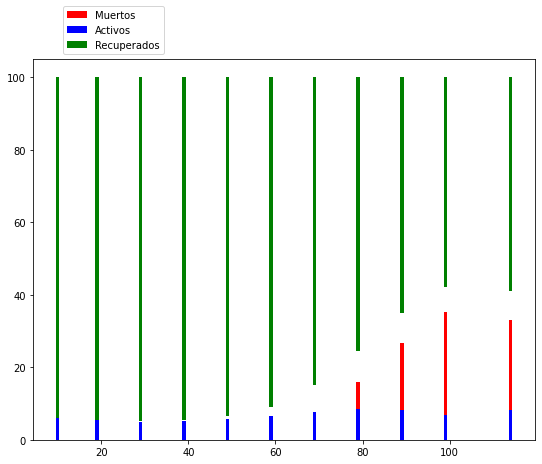

In [21]:
# como parte  de las comparaciones procederemos a visualizarlas con un grafico, que nos mostrará, 
# el porcentaje que representa cada una de las variables que se encontraban en la columna Recuperados del df_gen_edad
# del total de la edad.
import matplotlib.pyplot as plt
plt.figure(figsize=(9,7))
re=total_recuperados['Tasa_%-Recuperados']
ac=total_recuperados['Tasa_%-Activos']
de=total_recuperados['Tasa_%-Decesos']
ed=total_recuperados['Media']
plt.bar(ed,de,color="red",label="Muertos")
plt.bar(ed,ac,color="blue",label="Activos")
plt.bar(ed,re,color="green",bottom=[sum(data) for data in zip(de,ac)],label="Recuperados")
#plt.bar(year,data1,color="red",bottom=[sum(data) for data in zip(data2,data3)],label="C++")

plt.legend(loc="lower left",bbox_to_anchor=(0.05,1.0))
plt.show()


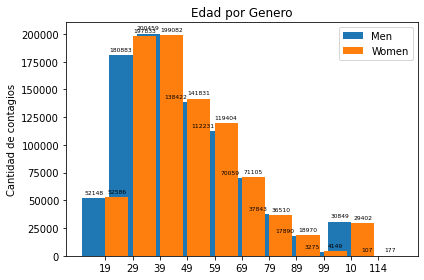

In [22]:
# por medio del siguiente grafico verificaremos la incidencia de la cantidad en el genero y la edad de los contagiados del virus.
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

labels = total_recuperados['Media'] # las eticas vendrán de la columna media
men_means = total_recuperados['Masculino'] # la variable men_means proviene de la columna masculino
women_means = total_recuperados['Femenino'] # la variable women_means proviene de la columna femenino.

x = np.arange(len(labels))  # the label locations, convertimos la variable x en un arrglo totalmente nuerico de numpy
width = 0.85  # the width of the bars las dimensiones del grafico de barras

fig, ax = plt.subplots() 
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Cantidad de contagios')
ax.set_title('Edad por Genero')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
def autolabel(rects): # con esta fucion crearemos las etiquetas internas del numero total de hombres y mujeres contagiados por edad.
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects: # con este bucle le diremos que recorra la recta
        height = rect.get_height() # para cada recta obtenga el tamaño
        ax.annotate('{}'.format(height), # anote en un diccionario el tamaño con el formato del mismo tamaño
                    xy=(rect.get_x() + rect.get_width() / 2, height), # para las rectas del eje X y Y obtenga sus dimensiones 
                    xytext=(0, 3),  # 3 points vertical offset 
                    textcoords="offset points", 
                    ha='center', va='bottom',fontsize=6)

autolabel(rects1) # con la clase recta uno ejecute el auto etiquetado
autolabel(rects2) # con la clase recta dos ejecute el auto etiquetado
fig.tight_layout() # dejar la figura con diseño estrecho.
plt.show() # mostrar el plot.


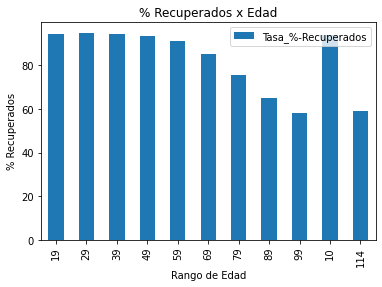

In [23]:
# Ahora procederemos a graficar las noticias alentadoras los recuperados por edad.
import matplotlib.pyplot as plt
total_recuperados.plot(kind='bar',x='Media',y='Tasa_%-Recuperados') # con total_recuperados, mostrar un grafico de barras en x la edad media y en Y cantidad
plt.title('% Recuperados x Edad') # Titulo del plot
plt.xlabel('Rango de Edad') # etiqueta en x
plt.ylabel('% Recuperados') # etiqueta en y
plt.title('% Recuperados x Edad') # Titulo del plot
#plt.annotate(text='%',xy=(x,y))
plt.show() # Mostrar plot

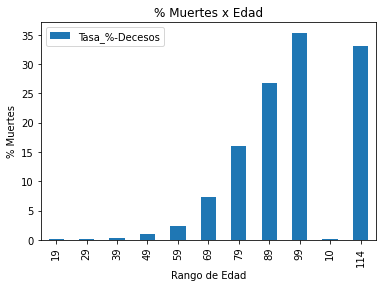

In [24]:
# Ahora queremos saber cuantos son los fallecidos por edad, por lo que con las mismas instrucciones del plot anterior procedemos a cambiar la columna
# y Tasa recuperados por la de porcentual de decesos
import matplotlib.pyplot as plt

total_recuperados.plot(kind='bar',x='Media',y='Tasa_%-Decesos')
plt.title('% Muertes x Edad')
plt.xlabel('Rango de Edad')
plt.ylabel('% Muertes')
plt.show()
# como podemos ver enocntramos una variable relacional en la cual, a mayor edad, mayor tasa de muertes.

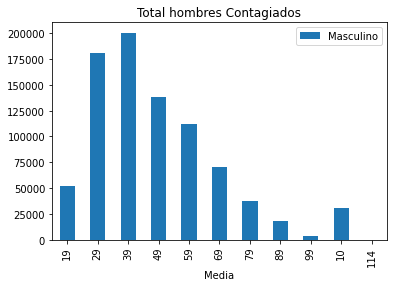

In [25]:
# Ahora deseamos ver por genero y edad cuantos han sido contagiados en este caso hombres.
total_recuperados.plot(kind='bar',x='Media',y='Masculino')
plt.title('Total hombres Contagiados')
plt.show()
# Como podemos ver son los hombres entre los 20 y los 50 los mas contagiados

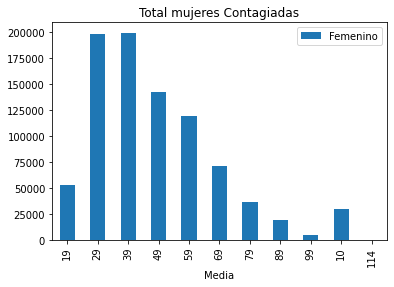

In [26]:
# Ahora deseamos ver por genero y edad cuantos han sido contagiados en este caso mujeres.
total_recuperados.plot(kind='bar',x='Media',y='Femenino')
plt.title('Total mujeres Contagiadas')
plt.show()
# en el caso de las mujeres se presenta la misma incidencia que en los hombres.
# Por lo que para lograr estudiar mejor las estadisticas de genero, procederemos a incluir la variable genero en el estudio del estats model, 
# para saber si podemos lograr pronosticar por genero, como será la incidencia en contagios y muertes. 

#Exportar a Excel
exportar=pd.ExcelWriter("Recuperación_Covid.xlsx")
total_recuperados.to_excel(exportar,sheet_name="Edad_Genero",float_format=True,header=True)
exportar.save()

##DESCRIPCION DE LOS CASOS COLUMNA Tipo de contagio POR SEXO Y EDAD.

In [27]:
#Ahora realizaremos el analisis de la columna tipo de contagio, por lo que creamos un nuevo dataframe, 
# con las otras variables que visualizamos anteriormente.
df_contagio=df_cases[['Sexo','Edad','Tipo de contagio']].dropna()

In [28]:
# Ahora validaremos como está compuesta la columna convirtiendo el tipo de contagio en el indice.
total_columna=df_contagio.groupby(by='Tipo de contagio')['Edad'].sum()
total_columna
# dado a que la columna presenta muchas inconsistencias en la escritura de sus variables, y python es muy sensible a estos cambios,
# convertiremos en una sola variable las tres formas en las que fueron escritas EN ESTUDIO, En Estudio y En estudio y las dos forma en las que fueron escritas
# las palabras RELACIONADO y Relacionado.

Tipo de contagio
EN ESTUDIO          484
En Estudio       503299
En estudio     62624009
Importado         92619
RELACIONADO        1830
Relacionado     5530207
Name: Edad, dtype: int32

In [29]:
#Comenzamos creando la femenino femenino para la variable sexo 
def generof(fila):
    sexf=fila['Sexo']
    if sexf == 'F':
        resultado=1
        return resultado
    else:
        resultado=0
        return resultado
df_contagio['Femenino']=df_contagio.apply(generof,axis=1)


In [30]:
# Procedemos a realizar la misma accion con genero Masculino
def generom(fila):
    sexm=fila['Sexo']
    if sexm =='M':
        respuesta=1
        return respuesta
    else:
        respuesta=0
        return respuesta
df_contagio['Masculino']=df_contagio.apply(generom,axis=1)


In [31]:
# Ahora generamos el cluster para la variable edad.
def cluster_edad(fila):
    decil=fila['Edad']
    if decil<=10:
        resultado="<=10"
        return resultado
    else:
        if decil>=11 and decil<=19:
            resultado="11:19"
            return resultado
        else:
            if decil>=20 and decil<=29:
                resultado="20:29"
                return resultado
            else:
                if decil>=30 and decil<=39:
                    resultado="30:39"
                    return resultado
                else:
                    if decil>=40 and decil<=49:
                        resultado="40:49"
                        return resultado
                    else:
                        if decil>=50 and decil<=59:
                            resultado="50:59"
                            return resultado
                        else:
                            if decil>=60 and decil<=69:
                                resultado="60:69"
                                return resultado
                            else:
                                if decil>=70 and decil<=79:
                                    resultado="70:79"
                                    return resultado
                                else:
                                    if decil>=80 and decil<=89:
                                        resultado="80:89"
                                        return resultado
                                    else:
                                        if decil>=90 and decil<=99:
                                            resultado="90:99"
                                            return resultado
                                        else:
                                            if decil>=100:
                                                resultado=">=100"
                                                return resultado
                                 
   # return resultado
df_contagio['Rango_Edad']=df_contagio.apply(cluster_edad,axis=1)


In [32]:
# Como lo mencionamos anteriormente convertiremos las tres variables en una sola condicionando a estas tres como una sola.
def estudio(fila):
    c1=fila['Tipo de contagio']
    if c1=='EN ESTUDIO' or c1=='En Estudio' or c1=='En estudio':
        c1=1
        return c1
    else:
        c1=0
        return c1
df_contagio['En_Estudio']=df_contagio.apply(estudio,axis=1)

In [33]:
# Efectuamos la misma accion con la columna tipo de contagio importado
def importado(fila):
    c2=fila['Tipo de contagio']
    if c2=='Importado':
        c2=1
        return c2
    else:
        c2=0
        return c2
df_contagio['Importados']=df_contagio.apply(importado,axis=1)

In [34]:
# Realizamos la misma accion con la creacion de la columna relacionado
def relacionado(fila):
    c3=fila['Tipo de contagio']
    if c3=='RELACIONADO' or c3=='Relacionado':
        c3=1
        return c3
    else:
        c3=0
        return c3
df_contagio['Relacionados']=df_contagio.apply(relacionado,axis=1)

In [35]:
# visualizamos como quedó compuesta el dataframe
df_contagio=df_contagio[['Rango_Edad',
                         'Edad','Sexo',
                         'Femenino',
                         'Masculino',
                         'Tipo de contagio',
                         'En_Estudio',
                         'Importados',
                         'Relacionados'
                        ]]
df_contagio

,Rango_Edad,Edad,Sexo,Femenino,Masculino,Tipo de contagio,En_Estudio,Importados,Relacionados
0,11:19,19,F,1,0,Importado,0,1,0
1,30:39,34,M,0,1,Importado,0,1,0
2,50:59,50,F,1,0,Importado,0,1,0
3,50:59,55,M,0,1,Relacionado,0,0,1
4,20:29,25,M,0,1,Relacionado,0,0,1
...,...,...,...,...,...,...,...,...,...
1719766,11:19,19,M,0,1,En estudio,1,0,0
1719767,11:19,19,M,0,1,En estudio,1,0,0
1719768,20:29,21,M,0,1,En estudio,1,0,0
1719769,11:19,19,M,0,1,En estudio,1,0,0


In [36]:
# Dado que obtuvimos un dataframe demasiado grande, procedemos a consolidarlo. 
total_contagios=df_contagio.groupby(by='Rango_Edad').agg({'Edad':'mean',
                                                          'Tipo de contagio':'count',
                                                          'Femenino':'sum',
                                                          'Masculino':'sum',
                                                          'En_Estudio':'sum',
                                                          'Importados':'sum',
                                                          'Relacionados':'sum'
                                                        })
total_contagios=total_contagios.rename(columns={'Edad':'Media','Tipo de contagio':'Total'})
total_contagios

,Media,Total,Femenino,Masculino,En_Estudio,Importados,Relacionados
Rango_Edad,,,,,,,
11:19,15.855015,104804,52615,52189,93915,72,10817
20:29,24.979011,378909,197898,181011,344147,482,34280
30:39,34.317544,399734,199169,200565,362042,576,37116
40:49,44.150485,280533,141951,138582,256889,370,23274
50:59,54.305879,232164,119648,112516,214966,363,16835
60:69,63.954548,142063,71470,70593,132748,228,9087
70:79,73.963694,75388,36912,38476,70489,83,4816
80:89,83.623289,37838,19396,18442,34856,31,2951
90:99,92.481462,7714,4305,3409,6911,1,802


In [37]:
#Tasa Estudio
# al igual que con el dataframe anterior realizamos una distribucion por tasas haremos lo mismo que con este.
def tasa_Estudio(fila):
    tasa=(fila['En_Estudio']/fila['Total'])*100 #+str('%')
    return tasa
total_contagios['Tasa_%-D_Estudio']=total_contagios.apply(tasa_Estudio,axis=1)


In [38]:
#Tasa Estudio
def tasa_Importados(fila):
    tasa=(fila['Importados']/fila['Total'])*100 #+str('%')
    return tasa
total_contagios['Tasa_%-Importados']=total_contagios.apply(tasa_Importados,axis=1)


In [39]:
#Tasa Estudio
def tasa_Relacionados(fila):
    tasa=(fila['Relacionados']/fila['Total'])*100 #+str('%')
    return tasa
total_contagios['Tasa_%-Relacionados']=total_contagios.apply(tasa_Relacionados,axis=1)


In [40]:
total_contagios
# Ahora sabemos que entre el 89% y 93% de los contagiados no saben o no mencionan como fueron contagiados, practimente menos del 1% son importados,
# y solamente entre el el 6 y el 10% el restante manfestaron saber como fueron contagiados.    

,Media,Total,Femenino,Masculino,En_Estudio,Importados,Relacionados,Tasa_%-D_Estudio,Tasa_%-Importados,Tasa_%-Relacionados
Rango_Edad,,,,,,,,,,
11:19,15.855015,104804,52615,52189,93915,72,10817,89.610129,0.068700,10.321171
20:29,24.979011,378909,197898,181011,344147,482,34280,90.825766,0.127207,9.047027
30:39,34.317544,399734,199169,200565,362042,576,37116,90.570730,0.144096,9.285175
40:49,44.150485,280533,141951,138582,256889,370,23274,91.571758,0.131892,8.296350
50:59,54.305879,232164,119648,112516,214966,363,16835,92.592305,0.156355,7.251340
60:69,63.954548,142063,71470,70593,132748,228,9087,93.443050,0.160492,6.396458
70:79,73.963694,75388,36912,38476,70489,83,4816,93.501618,0.110097,6.388285
80:89,83.623289,37838,19396,18442,34856,31,2951,92.119034,0.081928,7.799038
90:99,92.481462,7714,4305,3409,6911,1,802,89.590355,0.012963,10.396681


##UBICACION DEL CASO 

In [41]:
# Otra variable que analizaremos es la ubicacion del caso, es decir en donde se encuentra el enfermo del caso.
# Por lo que crearemos un nuevo dataframe creando nuevas columnas de las ubicaciones de los casos.
df_ubicacion=df_cases[['Edad','Sexo','Ubicación del caso']].dropna()

In [42]:
def cluster_edad(fila):
    decil=fila['Edad']
    if decil<=10:
        resultado="<=10"
        return resultado
    else:
        if decil>=11 and decil<=19:
            resultado="11:19"
            return resultado
        else:
            if decil>=20 and decil<=29:
                resultado="20:29"
                return resultado
            else:
                if decil>=30 and decil<=39:
                    resultado="30:39"
                    return resultado
                else:
                    if decil>=40 and decil<=49:
                        resultado="40:49"
                        return resultado
                    else:
                        if decil>=50 and decil<=59:
                            resultado="50:59"
                            return resultado
                        else:
                            if decil>=60 and decil<=69:
                                resultado="60:69"
                                return resultado
                            else:
                                if decil>=70 and decil<=79:
                                    resultado="70:79"
                                    return resultado
                                else:
                                    if decil>=80 and decil<=89:
                                        resultado="80:89"
                                        return resultado
                                    else:
                                        if decil>=90 and decil<=99:
                                            resultado="90:99"
                                            return resultado
                                        else:
                                            if decil>=100:
                                                resultado=">=100"
                                                return resultado
                                 
   # return resultado
df_ubicacion['Rango_Edad']=df_ubicacion.apply(cluster_edad,axis=1)


In [43]:
def generof(fila):
    sexf=fila['Sexo']
    if sexf == 'F':
        resultado=1
        return resultado
    else:
        resultado=0
        return resultado
df_ubicacion['Femenino']=df_ubicacion.apply(generof,axis=1)

In [44]:
def generom(fila):
    sexm=fila['Sexo']
    if sexm == 'M':
        respuesta=1
        return respuesta
    else:
        respuesta=0
        return respuesta
df_ubicacion['Masculino']=df_ubicacion.apply(generom,axis=1)

In [45]:
# Una de las variables que encontramos fue la casa por lo que consolidamos esa variable en una nueva columna.
def casa(fila):
    uc=fila['Ubicación del caso']
    if uc=='CASA' or uc=='Casa' or uc=='casa':
        home=1
        return home
    else:
        home=0
        return home
df_ubicacion['Casa']=df_ubicacion.apply(casa,axis=1)    


In [46]:
# igualmente con los que ya fallecieron.
def fallecidos(fila):
    uf=fila['Ubicación del caso']
    if uf=='Fallecido':
        fa=1
        return fa
    else:
        fa=0
        return fa
df_ubicacion['Fallecidos']=df_ubicacion.apply(fallecidos,axis=1)

def hospitalizados(fila):
    uh=fila['Ubicación del caso']
    if uh=='Hospital':
        pa=1
        return pa
    else:
        pa=0
        return pa
df_ubicacion['Hospitalizados']=df_ubicacion.apply(hospitalizados,axis=1)

In [47]:
# Otro de los casos son los que se encuentran en la UCI u hospital
def ucis(fila):
    uu=fila['Ubicación del caso']
    if uu=='Hospital UCI' or uu=='Hospital':
        hu=1
        return hu
    else:
        hu=0
        return hu
      
df_ubicacion['Ucis']=df_ubicacion.apply(ucis,axis=1)   

In [48]:
df_ubicacion=df_ubicacion[['Edad','Rango_Edad','Sexo','Femenino','Masculino','Ubicación del caso','Casa','Fallecidos','Ucis']] #'Hospitalizados',
df_ubicacion
#Visualizamos el dataframe df_ubicacion el cual sigue siendo muy grande, por lo que hay que consolidarlo.  

,Edad,Rango_Edad,Sexo,Femenino,Masculino,Ubicación del caso,Casa,Fallecidos,Ucis
0,19,11:19,F,1,0,Casa,1,0,0
1,34,30:39,M,0,1,Casa,1,0,0
2,50,50:59,F,1,0,Casa,1,0,0
3,55,50:59,M,0,1,Casa,1,0,0
4,25,20:29,M,0,1,Casa,1,0,0
...,...,...,...,...,...,...,...,...,...
1719766,19,11:19,M,0,1,Casa,1,0,0
1719767,19,11:19,M,0,1,Casa,1,0,0
1719768,21,20:29,M,0,1,Casa,1,0,0
1719769,19,11:19,M,0,1,Casa,1,0,0


In [49]:
total_ubicacion=df_ubicacion.groupby(by='Rango_Edad').agg({'Edad':'mean',
                                                           'Ubicación del caso':'count',
                                                           'Femenino':'sum',
                                                           'Masculino':'sum',
                                                           'Casa':'sum',
                                                           'Fallecidos':'sum',
                                                           'Ucis':'sum'
                                                        }).reset_index() #'Hospitalizados':'sum'
total_ubicacion=total_ubicacion.rename(columns={'Edad':'Media','Ubicación del caso':'Total'})
total_ubicacion
# Una vez consolidado el dataframe podemos ver que la mayoria de los casos de infectados se encuentran en la casa.
# una vez vista la cantidad de enfermos en UCIS, podemos ver la razón por la cual se congestionan estos servicios medicos,
# pues pese a que no la mayoria no llega a las UCIS, la cantidad que llega si es lo suficientemente grande para su congestión  
# Sin embargo para poder hacernos una idea mas global realizaremos el estudio de tasas por edad.

,Rango_Edad,Media,Total,Femenino,Masculino,Casa,Fallecidos,Ucis
0,11:19,15.854734,104718,52580,52138,103885,63,770
1,20:29,24.979116,378664,197810,180854,375855,478,2331
2,30:39,34.317120,399476,199063,200413,395224,1148,3104
3,40:49,44.149684,280170,141802,138368,274093,2537,3540
4,50:59,54.303577,231477,119336,112141,220658,5655,5164
5,60:69,63.949451,140932,71001,69931,125330,10286,5316
6,70:79,73.953017,74112,36405,37707,58193,11910,4009
7,80:89,83.610301,36636,18859,17777,24650,9864,2122
8,90:99,92.470700,7355,4109,3246,4419,2624,312
9,<=10,5.718528,60237,29394,30843,58851,64,1322


In [50]:
def porcentaje_casa(fila):
    t=fila['Total']
    c=fila['Casa']
    pc=(c/t)*100
    return pc
total_ubicacion['%_Casa']=total_ubicacion.apply(porcentaje_casa,axis=1)

In [51]:
def porcentaje_fallecidos(fila):
    t=fila['Total']
    f=fila['Fallecidos']
    pf=(f/t)*100
    return pf
total_ubicacion['%_Fallecidos']=total_ubicacion.apply(porcentaje_fallecidos,axis=1)

In [52]:
def porcentaje_ucis(fila):
    t=fila['Total']
    u=fila['Ucis']
    pu=(u/t)*100
    return pu
total_ubicacion['%_Ucis']=total_ubicacion.apply(porcentaje_ucis,axis=1)

In [53]:
total_ubicacion
# En tasas porcentuales vemos que los mayores entre los 50 en adelante, son los que mas llegan a las ucis igualmente son los que mas fallecen,
# los que menos van a las ucis son los niños, adolescentes y las personas entre los  

,Rango_Edad,Media,Total,Femenino,Masculino,Casa,Fallecidos,Ucis,%_Casa,%_Fallecidos,%_Ucis
0,11:19,15.854734,104718,52580,52138,103885,63,770,99.204530,0.060162,0.735308
1,20:29,24.979116,378664,197810,180854,375855,478,2331,99.258181,0.126233,0.615585
2,30:39,34.317120,399476,199063,200413,395224,1148,3104,98.935606,0.287376,0.777018
3,40:49,44.149684,280170,141802,138368,274093,2537,3540,97.830960,0.905522,1.263519
4,50:59,54.303577,231477,119336,112141,220658,5655,5164,95.326102,2.443007,2.230891
5,60:69,63.949451,140932,71001,69931,125330,10286,5316,88.929413,7.298555,3.772032
6,70:79,73.953017,74112,36405,37707,58193,11910,4009,78.520348,16.070272,5.409380
7,80:89,83.610301,36636,18859,17777,24650,9864,2122,67.283546,26.924337,5.792117
8,90:99,92.470700,7355,4109,3246,4419,2624,312,60.081577,35.676411,4.242012
9,<=10,5.718528,60237,29394,30843,58851,64,1322,97.699089,0.106247,2.194664


In [54]:
total_columna=df_cases.groupby(by='Ubicación del caso')['Edad'].sum()
total_columna

Ubicación del caso
CASA                 253
Casa            63673888
Fallecido        3113537
Hospital         1286661
Hospital UCI      184242
casa              118512
Name: Edad, dtype: int32

In [55]:
##DESCRIPCION DE LOS CASOS COLUMNA Estado POR SEXO Y EDAD.

In [56]:
# Otra de las variables categoricas que nos encontramos en el estudio, son el estado del paciente,
# por lo que procedemos a desagregarlas para su estudio. 
total_columnaEstado=df_cases.groupby(by='Estado')['Edad'].sum()
total_columnaEstado

Estado
Fallecido     3113537
Grave          184242
LEVE               42
Leve         63792611
Moderado      1286266
moderado          395
Name: Edad, dtype: int32

In [57]:
#Creamos un nuevo dataframe llamado df_estado y realizamos las mismas actividades que con los anteriores. 
df_estado=df_cases[['Edad','Sexo','Estado']].dropna()

In [58]:
def cluster_edad(fila):
    decil=fila['Edad']
    if decil<=10:
        resultado="<=10"
        return resultado
    else:
        if decil>=11 and decil<=19:
            resultado="11:19"
            return resultado
        else:
            if decil>=20 and decil<=29:
                resultado="20:29"
                return resultado
            else:
                if decil>=30 and decil<=39:
                    resultado="30:39"
                    return resultado
                else:
                    if decil>=40 and decil<=49:
                        resultado="40:49"
                        return resultado
                    else:
                        if decil>=50 and decil<=59:
                            resultado="50:59"
                            return resultado
                        else:
                            if decil>=60 and decil<=69:
                                resultado="60:69"
                                return resultado
                            else:
                                if decil>=70 and decil<=79:
                                    resultado="70:79"
                                    return resultado
                                else:
                                    if decil>=80 and decil<=89:
                                        resultado="80:89"
                                        return resultado
                                    else:
                                        if decil>=90 and decil<=99:
                                            resultado="90:99"
                                            return resultado
                                        else:
                                            if decil>=100:
                                                resultado=">="
                                                return resultado
                                 
   # return resultado
df_estado['Rango_Edad']=df_estado.apply(cluster_edad,axis=1)


In [59]:
def generof(fila):
    sexf=fila['Sexo']
    if sexf == 'F':
        resultado=1
        return resultado
    else:
        resultado=0
        return resultado
df_estado['Femenino']=df_estado.apply(generof,axis=1)

In [60]:
def generom(fila):
    sexm=fila['Sexo']
    if sexm =='M':
        respuesta=1
        return respuesta
    else:
        respuesta=0
        return respuesta
df_estado['Masculino']=df_estado.apply(generom,axis=1)

In [61]:
def fallecidos(fila):
    uf=fila['Estado']
    if uf=='Fallecido':
        fa=1
        return fa
    else:
        fa=0
        return fa
df_estado['Fallecidos']=df_estado.apply(fallecidos,axis=1)

In [62]:
def leves(fila):
    l=fila['Estado']
    if l=='Leve' or l=='LEVE':
        le=1
        return le
    else:
        le=0
        return le
df_estado['Leves']=df_estado.apply(leves,axis=1)   

In [63]:
def moderados(fila):
    m=fila['Estado']
    if m=='moderado' or m=='Moderado':
        mo=1
        return mo 
    else:
        mo=0
        return mo
df_estado['Moderados']=df_estado.apply(moderados,axis=1)

In [64]:
def graves(fila):
    g=fila['Estado']
    if g=='Grave':
        gr=1
        return gr
    else:
        gr=0
        return gr 
df_estado['Graves']=df_estado.apply(graves,axis=1)

In [65]:
df_estado=df_estado[['Rango_Edad','Edad','Sexo','Femenino','Masculino','Estado','Leves','Moderados','Graves','Fallecidos']]

In [66]:
total_estado=df_estado.groupby(by='Rango_Edad').agg({'Edad':'mean',
                                                    'Estado':'count',
                                                    'Femenino':'sum',
                                                    'Masculino':'sum',
                                                    'Leves':'sum',
                                                    'Moderados':'sum',
                                                    'Graves':'sum',
                                                    'Fallecidos':'sum'
                                                    }).reset_index() #'Hospitalizados':'sum'
total_estado=total_estado.rename(columns={'Edad':'Media','Estado':'Total'})
total_estado
# una vez consolidadas las cantidades, podemos ver que en la mayoria el virus presenta ataques leves a los contagiados.
# Sin embargo procederemos a ver las tasas porcentuales.

,Rango_Edad,Media,Total,Femenino,Masculino,Leves,Moderados,Graves,Fallecidos
0,11:19,15.854734,104718,52580,52138,103885,701,69,63
1,20:29,24.979116,378664,197810,180854,375855,2186,145,478
2,30:39,34.317120,399476,199063,200413,395224,2796,308,1148
3,40:49,44.149684,280170,141802,138368,274093,3151,389,2537
4,50:59,54.303577,231477,119336,112141,220658,4468,696,5655
5,60:69,63.949451,140932,71001,69931,125330,4517,799,10286
6,70:79,73.953017,74112,36405,37707,58193,3429,580,11910
7,80:89,83.610301,36636,18859,17777,24650,1913,209,9864
8,90:99,92.470700,7355,4109,3246,4419,301,11,2624
9,<=10,5.718528,60237,29394,30843,58851,1236,86,64


In [67]:
def tasa_leves(fila):
    t=fila['Total']
    l=fila['Leves']
    tasa1=(l/t)*100
    return tasa1
total_estado['(%)casos-Leves']=total_estado.apply(tasa_leves,axis=1)

In [68]:
def tasa_graves(fila):
    t=fila['Total']
    g=fila['Graves']
    tasa2=(g/t)*100
    return tasa2
total_estado['(%)casos-Graves']=total_estado.apply(tasa_graves,axis=1)

In [69]:
def tasa_moderados(fila):
    t=fila['Total']
    l=fila['Moderados']
    tasa2=(l/t)*100
    return tasa2
total_estado['(%)casos-Moderados']=total_estado.apply(tasa_moderados,axis=1)

In [70]:
def tasa_fallecidos(fila):
    t=fila['Total']
    f=fila['Fallecidos']
    tasa3=(f/t)*100
    return tasa3
total_estado['(%)casos-Fallecidos']=total_estado.apply(tasa_fallecidos,axis=1)

In [71]:
total_estado
# como podemos visualizar dependiendo de la edad entre el 60% como minimo y el 97% como maximo son casos leves.
# en todos los casos menos del 1% son casos graves.
#y en comparacion con las otras dos los fallecidos van desde el 0.10% hasta el 35% de muertes. 

,Rango_Edad,Media,Total,Femenino,Masculino,Leves,Moderados,Graves,Fallecidos,(%)casos-Leves,(%)casos-Graves,(%)casos-Moderados,(%)casos-Fallecidos
0,11:19,15.854734,104718,52580,52138,103885,701,69,63,99.204530,0.065891,0.669417,0.060162
1,20:29,24.979116,378664,197810,180854,375855,2186,145,478,99.258181,0.038293,0.577293,0.126233
2,30:39,34.317120,399476,199063,200413,395224,2796,308,1148,98.935606,0.077101,0.699917,0.287376
3,40:49,44.149684,280170,141802,138368,274093,3151,389,2537,97.830960,0.138844,1.124674,0.905522
4,50:59,54.303577,231477,119336,112141,220658,4468,696,5655,95.326102,0.300678,1.930213,2.443007
5,60:69,63.949451,140932,71001,69931,125330,4517,799,10286,88.929413,0.566940,3.205092,7.298555
6,70:79,73.953017,74112,36405,37707,58193,3429,580,11910,78.520348,0.782599,4.626781,16.070272
7,80:89,83.610301,36636,18859,17777,24650,1913,209,9864,67.283546,0.570477,5.221640,26.924337
8,90:99,92.470700,7355,4109,3246,4419,301,11,2624,60.081577,0.149558,4.092454,35.676411
9,<=10,5.718528,60237,29394,30843,58851,1236,86,64,97.699089,0.142769,2.051895,0.106247


##Tipo de Recuperación

In [72]:
# Otra variable de interes es saber el tipo de recuperacion, es decir como se sabe si el paciente se recupero,
# Aqui encontramos dos variables, se certifica por pcr y por el tiempo pasado. 
total_columnaTipo=df_cases.groupby(by='Tipo de recuperación')['Edad'].sum()
total_columnaTipo
# Por lo esta razon procedemos a realizar el mismo proceso anterior.

Tipo de recuperación
PCR        6844911
Tiempo    54200075
Name: Edad, dtype: int32

In [73]:
df_tiporecuperacion=df_cases[['Edad','Sexo','Tipo de recuperación']].dropna()

In [74]:
def cluster_edad(fila):
    decil=fila['Edad']
    if decil<=10:
        resultado="<=10"
        return resultado
    else:
        if decil>=11 and decil<=19:
            resultado="11:19"
            return resultado
        else:
            if decil>=20 and decil<=29:
                resultado="20:29"
                return resultado
            else:
                if decil>=30 and decil<=39:
                    resultado="30:39"
                    return resultado
                else:
                    if decil>=40 and decil<=49:
                        resultado="40:49"
                        return resultado
                    else:
                        if decil>=50 and decil<=59:
                            resultado="50:59"
                            return resultado
                        else:
                            if decil>=60 and decil<=69:
                                resultado="60:69"
                                return resultado
                            else:
                                if decil>=70 and decil<=79:
                                    resultado="70:79"
                                    return resultado
                                else:
                                    if decil>=80 and decil<=89:
                                        resultado="80:89"
                                        return resultado
                                    else:
                                        if decil>=90 and decil<=99:
                                            resultado="90:99"
                                            return resultado
                                        else:
                                            if decil>=100:
                                                resultado=">=100"
                                                return resultado
                                 
   # return resultado
df_tiporecuperacion['Rango_Edad']=df_tiporecuperacion.apply(cluster_edad,axis=1)


In [75]:
def generof(fila):
    sexf=fila['Sexo']
    if sexf == 'F':
        resultado=1
        return resultado
    else:
        resultado=0
        return resultado
df_tiporecuperacion['Femenino']=df_tiporecuperacion.apply(generof,axis=1)

In [76]:
def generom(fila):
    sexm=fila['Sexo']
    if sexm == 'M':
        respuesta=1
        return respuesta
    else:
        respuesta=0
        return respuesta
df_tiporecuperacion['Masculino']=df_tiporecuperacion.apply(generom,axis=1)

In [77]:
def recuperados_pcr(fila):
    tr=fila['Tipo de recuperación']
    if tr=='PCR':
        recuperado=1
        return recuperado
        
    else:
        recuperado=0
        return recuperado
df_tiporecuperacion['Prueba_PCR']=df_tiporecuperacion.apply(recuperados_pcr,axis=1)

        
    

In [78]:
def recuperados_tiempo(fila):
    tr=fila['Tipo de recuperación']
    if tr=='Tiempo':
        recuperadot=1
        return recuperadot
    else:
        recuperadot=0
        return recuperadot
               
df_tiporecuperacion['Recuperado-Tiempo']=df_tiporecuperacion.apply(recuperados_tiempo,axis=1)


In [79]:
df_tiporecuperacion=df_tiporecuperacion[['Rango_Edad','Edad','Sexo','Femenino','Masculino','Tipo de recuperación','Prueba_PCR','Recuperado-Tiempo']]
df_tiporecuperacion

,Rango_Edad,Edad,Sexo,Femenino,Masculino,Tipo de recuperación,Prueba_PCR,Recuperado-Tiempo
0,11:19,19,F,1,0,PCR,1,0
1,30:39,34,M,0,1,PCR,1,0
2,50:59,50,F,1,0,PCR,1,0
3,50:59,55,M,0,1,PCR,1,0
4,20:29,25,M,0,1,PCR,1,0
...,...,...,...,...,...,...,...,...
1701853,20:29,27,F,1,0,PCR,1,0
1701856,20:29,25,M,0,1,PCR,1,0
1702122,<=10,2,F,1,0,PCR,1,0
1702767,20:29,28,F,1,0,PCR,1,0


In [80]:
total_tipoRecuperacion=df_tiporecuperacion.groupby(by='Rango_Edad').agg({'Edad':'mean',
                                                                         'Tipo de recuperación':'count',
                                                                         'Femenino':'sum',
                                                                         'Masculino':'sum',
                                                                         'Prueba_PCR':'sum',
                                                                         'Recuperado-Tiempo':'sum'
                                                                        }).reset_index()
total_tipoRecuperacion=total_tipoRecuperacion.rename(columns={'Edad':'Media','Tipo de recuperación':'Total'})
total_tipoRecuperacion
# En este caso visualizamos que en cantidad la mayoria se le certifica la recuperacion por el tiempo.
# sin embargo procederemos a encontrar las tasas porcentuales.

,Rango_Edad,Media,Total,Femenino,Masculino,Prueba_PCR,Recuperado-Tiempo
0,11:19,15.858218,98884,49591,49293,9160,89724
1,20:29,24.981611,359348,187362,171986,39464,319884
2,30:39,34.309648,377593,187891,189702,44845,332748
3,40:49,44.137696,261773,133014,128759,30740,231033
4,50:59,54.272878,210827,109848,100979,23462,187365
5,60:69,63.866658,119992,62274,57718,12821,107171
6,70:79,73.840340,56182,29229,26953,5808,50374
7,80:89,83.485535,23920,13369,10551,2601,21319
8,90:99,92.459767,4300,2685,1615,476,3824
9,<=10,5.740158,56592,27700,28892,5458,51134


In [81]:
def tasa_recuperacionpcr(fila):
    p=fila['Prueba_PCR']
    t=fila['Total']
    tasa1=(p/t)*100 #+str('%')
    return tasa1
total_tipoRecuperacion['%-PCR']=total_tipoRecuperacion.apply(tasa_recuperacionpcr,axis=1)

In [82]:
def tasa_recuperaciontiempo(fila):
    r=fila['Recuperado-Tiempo']
    t=fila['Total']
    tasa2=(r/t)*100 #+str('%')
    return tasa2
total_tipoRecuperacion['%-Rec_tiempo']=total_tipoRecuperacion.apply(tasa_recuperaciontiempo,axis=1)

In [83]:
total_tipoRecuperacion
# al hacer la comparacion vemos que entre el 88% y el 90% se les certifica la recuperacion por tiempo y el restante por realizacion de las pruebas PCR

,Rango_Edad,Media,Total,Femenino,Masculino,Prueba_PCR,Recuperado-Tiempo,%-PCR,%-Rec_tiempo
0,11:19,15.858218,98884,49591,49293,9160,89724,9.263379,90.736621
1,20:29,24.981611,359348,187362,171986,39464,319884,10.982112,89.017888
2,30:39,34.309648,377593,187891,189702,44845,332748,11.876544,88.123456
3,40:49,44.137696,261773,133014,128759,30740,231033,11.742999,88.257001
4,50:59,54.272878,210827,109848,100979,23462,187365,11.128556,88.871444
5,60:69,63.866658,119992,62274,57718,12821,107171,10.684879,89.315121
6,70:79,73.840340,56182,29229,26953,5808,50374,10.337831,89.662169
7,80:89,83.485535,23920,13369,10551,2601,21319,10.873746,89.126254
8,90:99,92.459767,4300,2685,1615,476,3824,11.069767,88.930233
9,<=10,5.740158,56592,27700,28892,5458,51134,9.644473,90.355527


##Series Temporales


df_SeriesMensuales=pd.read_csv('SeriesMensuales.csv')
df_SeriesMensuales['Fecha']=pd.to_datetime(df_SeriesMensuales['Fecha'],errors='coerce')

df_SeriesMensuales.dtypes

In [84]:
# Otro de los estudios que es pertinente realizar es el de los tiempos con respecto a los lugares,
#por lo que procedemos a convertir las fechas en series temporales para poder analizar el tiempo que le toma al virus transmitirse,
# o en este caso cuanto se demoró el sistema en diagnosticar nuevo casos. 
df_DifusionViral=df_cases.groupby(by=[pd.to_datetime(df_cases['Fecha de diagnóstico'],errors='coerce'),'Nombre departamento'
                                     ]).agg({'Nombre municipio':'count'}).reset_index()
df_DifusionViral=df_DifusionViral.rename(columns={'Nombre municipio':'Total'})                                     
#df_DifusionViral=pd.to_datetime(df_DifusionViral['Fecha de diagnóstico'],errors='coerce')
df_DifusionViral                                   

,Fecha de diagnóstico,Nombre departamento,Total
0,2020-01-04,ANTIOQUIA,6
1,2020-01-04,BARRANQUILLA,3
2,2020-01-04,BOGOTA,81
3,2020-01-04,CASANARE,1
4,2020-01-04,CAUCA,3
...,...,...,...
8550,2021-05-01,TOLIMA,390
8551,2021-05-01,VALLE,272
8552,2021-05-01,VAUPES,1
8553,2021-06-01,BOYACA,1


In [85]:
# Para saber cuanto demora en iniciar los sintomas procedemos a convertir en serie temporal la fecha de inicio de los sintomas con respecto al departamento.
df_InicioSintomas=df_cases.groupby(by=[pd.to_datetime(df_cases['Fecha de inicio de síntomas'],errors='coerce'),'Nombre departamento'
                                     ]).agg({'Nombre municipio':'count'}).reset_index()
df_InicioSintomas=df_InicioSintomas.rename(columns={'Nombre municipio':'Total'})
df_InicioSintomas

,Fecha de inicio de síntomas,Nombre departamento,Total
0,2020-01-03,BOGOTA,3
1,2020-01-03,CARTAGENA,1
2,2020-01-03,VALLE,1
3,2020-01-04,ANTIOQUIA,12
4,2020-01-04,ATLANTICO,2
...,...,...,...
9220,2021-05-01,HUILA,1
9221,2021-05-01,NARIÑO,1
9222,2021-05-01,NORTE SANTANDER,1
9223,2021-05-01,PUTUMAYO,1


In [86]:
##Tiempo entre inicio de sintomas y diagnostico
#Una formula de medir la reaccion del sistema de salud, es medir la distancia de tiempo entre el inicio de los sintomas y la fecha de diagnostico,
# por lo que creamos un noevo dataframe para realizar la medicion,
#   
df_TiempoDiagnostico=df_cases[['Fecha de inicio de síntomas','Fecha de diagnóstico']].dropna()
df_TiempoDiagnostico['Fecha de inicio de síntomas']=pd.to_datetime(df_TiempoDiagnostico['Fecha de inicio de síntomas'],errors='coerce') #,format='%d-%m-%Y'
df_TiempoDiagnostico['Fecha de diagnóstico']=pd.to_datetime(df_TiempoDiagnostico['Fecha de diagnóstico'],errors='coerce')
df_TiempoDiagnostico['Tiempo-Diagnost']=(df_TiempoDiagnostico['Fecha de diagnóstico']-df_TiempoDiagnostico['Fecha de inicio de síntomas']).astype("timedelta64[D]").round() # convierte en time delta dias
"""
def tiempodiagnostico(fila):
    fd=fila['Fecha de diagnóstico']
    fi=fila['Fecha de inicio de síntomas']
    if fi>fd:
        fe=0
        return fe
    else:
        fe=fd-fi
        return fe
df_TiempoDiagnostico['Tiempo-Diagnost']=df_TiempoDiagnostico.apply(tiempodiagnostico,axis=1)
df_TiempoDiagnostico['Tiempo-Diagnost']=pd.to_numeric(df_TiempoDiagnostico['Tiempo-Diagnost'],errors='coerce')

#df_TiempoDiagnostico['Tiempo-Diagnost']=pd.to_numeric(df_TiempoDiagnostico['Tiempo-Diagnost'],errors='coerce')
"""
df_TiempoDiagnostico
# Como podemos ver  los primeros casos fueron muy grandes los tiempos de diagnostico pues estuvieron entre los 97 y 180 dias.
# sin embargo con tiempo el sistema fue mejorando sus tiempos de respuesta.

,Fecha de inicio de síntomas,Fecha de diagnóstico,Tiempo-Diagnost
0,2020-02-27,2020-06-03,97.0
1,2020-04-03,2020-09-03,153.0
2,2020-02-29,2020-09-03,187.0
3,2020-06-03,2020-11-03,153.0
4,2020-08-03,2020-11-03,92.0
...,...,...,...
1719766,2020-12-19,2021-03-01,72.0
1719767,2020-12-18,2021-02-01,45.0
1719768,2020-12-18,2021-02-01,45.0
1719769,2020-12-14,2020-12-31,17.0


In [87]:
df_TiempoDiagnostico['Tiempo-Diagnost'].sum()
# ahora debemos definir el tiempo optimo para realizar las mediciones del sistema, pues el día a día, como lo presentan los medios 
# y las secretarias de salud, no permiten hacernos una idea razonable del los estudios,
# por lo mismo procedemos a desagregar los tiempos.

20195578.0

In [88]:
import numpy as np
import datetime as dt
#Dia de la semana
#import datetime
# una de las formas de estandarizar el tiempo es pasar al calendario iso para desagregar los dias del mes.
def dias(fila):
    dia=fila['Fecha de diagnóstico']
    for i in range(len(df_TiempoDiagnostico)):
        diames=dia.isocalendar()
        return diames[2]
df_TiempoDiagnostico['Day-Week']=df_TiempoDiagnostico.apply(dias,axis=1)


In [89]:
#import datetime
#df_TiempoDiagnostico['Week_Year']=df_TiempoDiagnostico['Fecha de diagnóstico'].isocalendar([0][1])

# con la misma información creamos la serie temporal de la semana 
def semanas(fila):
    sem=fila['Fecha de diagnóstico']
    for i in range(len(df_TiempoDiagnostico)):
        fechasemana=sem.isocalendar() #returna tupla(year,week,day)
        return fechasemana[1]
df_TiempoDiagnostico['Week']=df_TiempoDiagnostico.apply(semanas,axis=1)

#df_TiempoDiagnostico

In [90]:
# Tiempo transcurrido entre los sintomas y el diagnóstico                                strftime('%d') string
# Con las series temporales anteriores, procedemos a crear una nueva tabla en la cual estan separados el mes el dia y el año.
df_TiempoDiagnostico['Day-Month']=df_TiempoDiagnostico['Fecha de diagnóstico'].dt.day 
df_TiempoDiagnostico['Month-Year']=df_TiempoDiagnostico['Fecha de diagnóstico'].dt.month
df_TiempoDiagnostico['Year']=df_TiempoDiagnostico['Fecha de diagnóstico'].dt.year
df_TiempoDiagnostico

,Fecha de inicio de síntomas,Fecha de diagnóstico,Tiempo-Diagnost,Day-Week,Week,Day-Month,Month-Year,Year
0,2020-02-27,2020-06-03,97.0,3,23,3,6,2020
1,2020-04-03,2020-09-03,153.0,4,36,3,9,2020
2,2020-02-29,2020-09-03,187.0,4,36,3,9,2020
3,2020-06-03,2020-11-03,153.0,2,45,3,11,2020
4,2020-08-03,2020-11-03,92.0,2,45,3,11,2020
...,...,...,...,...,...,...,...,...
1719766,2020-12-19,2021-03-01,72.0,1,9,1,3,2021
1719767,2020-12-18,2021-02-01,45.0,1,5,1,2,2021
1719768,2020-12-18,2021-02-01,45.0,1,5,1,2,2021
1719769,2020-12-14,2020-12-31,17.0,4,53,31,12,2020


In [91]:
# para ajustar las semanas, procedemos a crear un bucle que nos diga cual es la llamada semana D o la semana de inicio, y para que 
# no repita las semanas en el años siguiente le decimos que cuando complete el año, inicie la serie temporal de la semana del nueco año,
# no con la semana 1 sino con la 53 y continue numerando las semanas así por cada cambio de año. 
def semana_d(fila):
    s=fila['Week']
    a=fila['Year']
    for i in range(len(df_TiempoDiagnostico)):
        if a==2021:
            w=53+s
            return w
        else:
            w=s
            return w
df_TiempoDiagnostico['Week-Period']=df_TiempoDiagnostico.apply(semana_d,axis=1)

In [92]:
# Realizamos el mismo proceso para los meses del año. 
def mes_d(fila):
    m=fila['Month-Year']
    a=fila['Year']
    for i in range(len(df_TiempoDiagnostico)):
        if a==2021:
            mo=12+m
            return mo
        else:
            mo=m
            return mo 
df_TiempoDiagnostico['Month-Period']=df_TiempoDiagnostico.apply(mes_d,axis=1) 

In [93]:
#series semanal
#Menor tiempo 
mt=0
#Mayor periodo
mp=58
#uno de los problemas que se presentan son los periodos inconsistentes,
#dado que hay muchas incosistencias porque muchos de los datos se obtuvieron por encuesta y los pacientes no tenian en cuenta, los tiempos,
# procedemos a limitar la generacion de la serie temporal, a aquellas semanas en las que el tiempo de diagnostico es menor a 0, es decir, la misma semana,
# y un periodo mayor a la cantidad de semananas de la fecha en la que fue realizado el evento.
# es decir eliminar las series temporales negativas.   
sr_WeekDiag=df_TiempoDiagnostico[['Fecha de diagnóstico','Tiempo-Diagnost','Week','Week-Period']].dropna()
sr_WeekDiag=sr_WeekDiag.drop(sr_WeekDiag[sr_WeekDiag['Tiempo-Diagnost']<mt].index) #.index
sr_WeekDiag=sr_WeekDiag.drop(sr_WeekDiag[sr_WeekDiag['Week-Period']>mp].index)
#sr_TiempoDiagnostico['Tiempo-Diagnost']=pd.to_numeric(sr_TiempoDiagnostico['Tiempo-Diagnost'],downcast='float',errors='coerce')
#sr_TiempoDiagnostico['Tiempo-Diagnost'].astype(float)
sr_WeekDiag

,Fecha de diagnóstico,Tiempo-Diagnost,Week,Week-Period
0,2020-06-03,97.0,23,23
1,2020-09-03,153.0,36,36
2,2020-09-03,187.0,36,36
3,2020-11-03,153.0,45,45
4,2020-11-03,92.0,45,45
...,...,...,...,...
1719764,2021-02-01,44.0,5,58
1719767,2021-02-01,45.0,5,58
1719768,2021-02-01,45.0,5,58
1719769,2020-12-31,17.0,53,53


In [94]:
#SeriesMensuales
# Realizamos el mismo proceso con la periodicidad mensual
mt=0
mp=13
sr_MonthDiag=df_TiempoDiagnostico[['Fecha de diagnóstico','Tiempo-Diagnost','Month-Year','Month-Period']].dropna()
sr_MonthDiag=sr_MonthDiag.drop(sr_MonthDiag[sr_MonthDiag['Tiempo-Diagnost']<mt].index) #.index
sr_MonthDiag=sr_MonthDiag.drop(sr_MonthDiag[sr_MonthDiag['Month-Period']>mp].index)

sr_MonthDiag

,Fecha de diagnóstico,Tiempo-Diagnost,Month-Year,Month-Period
0,2020-06-03,97.0,6,6
1,2020-09-03,153.0,9,9
2,2020-09-03,187.0,9,9
3,2020-11-03,153.0,11,11
4,2020-11-03,92.0,11,11
...,...,...,...,...
1719727,2020-12-30,14.0,12,12
1719736,2020-12-31,15.0,12,12
1719741,2020-12-24,73.0,12,12
1719742,2020-12-24,73.0,12,12


In [95]:
##Consolidado de dias ranscurridos entre el inicio de los sintomas y la fecha de reporte 
data_WeekDiag=sr_WeekDiag.groupby(by='Week-Period').agg({'Week-Period':'mean',
                                                         'Fecha de diagnóstico':'count',
                                                         'Tiempo-Diagnost':'mean'
                                                        }).round(2)#.reset_index().round(2)
data_WeekDiag=data_WeekDiag.rename(columns={'Week-Period':'Semanas',
                                            'Fecha de diagnóstico':'NuevosContagios',
                                            'Tiempo-Diagnost':'DiasTranscurridos'})
data_WeekDiag
# Ahora consolidamos y encontramos en cada semana transcurrida los nuevos contagios y los dias transcurridos entre cada contagio

,Semanas,NuevosContagios,DiasTranscurridos
Week-Period,,,
1,1.0,6,1.00
2,2.0,1375,0.03
6,6.0,688,18.27
7,7.0,2399,12.48
10,10.0,531,37.20
11,11.0,4097,30.33
12,12.0,121,5.14
13,13.0,389,8.50
14,14.0,335,17.26


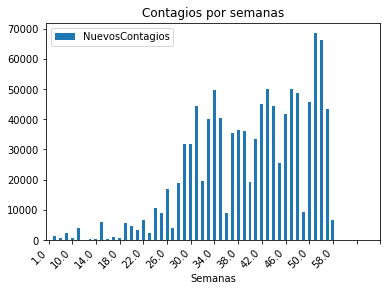

In [96]:
import matplotlib.pyplot as plt
data_WeekDiag.plot(kind='bar',x='Semanas',y='NuevosContagios',animated=True)
plt.title('Contagios por semanas')
serie=[0,4,8,12,16,20,24,28,32,36,40,44,48,52,56]
plt.xticks(serie,rotation=45,ha='right')
plt.show()
# con la informacion obtenida anteriormente ya podemos generar nuestro nuevo plot de los contagios por semana.
# En este caso debemos obviar la semana las ultimas 4 semanas, pues el sistema se demora eso, en construir la informacion de las otras dos anteriores,
# es decir, en la semana 54 a 58 se estan construyendo los datos de las semanas 50 a 54. 

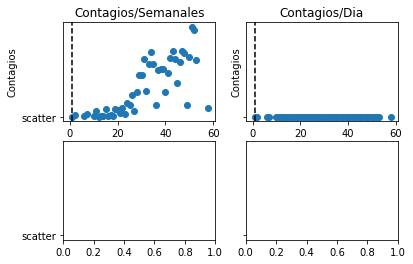

In [97]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib 
datos1=data_WeekDiag[['Semanas','NuevosContagios']]
datos2=data_WeekDiag[['Semanas','DiasTranscurridos']]
prom1=datos1.apply(np.mean)
prom2=datos2.apply(np.mean)
f,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,sharey=True)

ax1.plot('scatter')
ax1.scatter(datos1.Semanas,datos1.NuevosContagios)
ax1.axvline(datos1.Semanas.all(),ymax=datos1.Semanas.max(),color='k',linestyle='--')
#ax1.axhline(datos1.NuevosContagios.item(),color='k',linestyle='--')
ax1.set_title('Contagios/Semanales')
ax1.set_xlabel('Semanas')
ax1.set_ylabel('Contagios')

ax2.plot('scatter')
ax2.scatter(datos2.Semanas,datos2.DiasTranscurridos)
ax2.axvline(datos2.Semanas.all(),ymax=datos2.Semanas.max(),color='k',linestyle='--')
#ax1.axhline(datos1.NuevosContagios.item(),color='k',linestyle='--')
ax2.set_title('Contagios/Dia')
ax2.set_xlabel('Semanas')
ax2.set_ylabel('Contagios')


plt.show()

In [98]:
# Realizamos el mismo estudio para las series temporales mensuales.

data_MonthDiag=sr_MonthDiag.groupby(by='Month-Period').agg({'Month-Period':'max',
                                                            'Fecha de diagnóstico':'count',
                                                            'Tiempo-Diagnost':'mean'
                                                            }).round(2)#.reset_index().round(2)
data_MonthDiag= data_MonthDiag.rename(columns={'Month-Period':'Mes',
                                               'Fecha de diagnóstico':'NuevosContagios',
                                               'Tiempo-Diagnost':'DiasTranscurridos'
                               })
#data_WeekDiag.round(2)
data_MonthDiag

,Mes,NuevosContagios,DiasTranscurridos
Month-Period,,,
1,1,1381,0.03
2,2,3087,13.77
3,3,5321,28.19
4,4,8105,43.35
5,5,20090,40.10
6,6,42204,39.42
7,7,127514,43.47
8,8,156693,53.18
9,9,128505,61.01


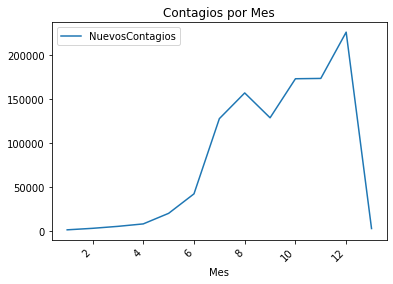

In [99]:
import matplotlib.pyplot as plt
data_MonthDiag.plot(kind='line',x='Mes',y='NuevosContagios',animated=True)
plt.title('Contagios por Mes')
plt.xticks(rotation=45,ha='right')
plt.show()
# por lo mismo debemos obiviar el comportamiento de los ultimos 2 meses.

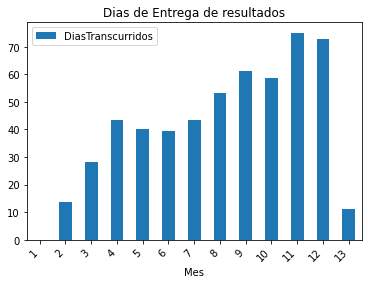

In [100]:
import matplotlib.pyplot as plt
data_MonthDiag.plot(kind='bar',x='Mes',y='DiasTranscurridos',animated=True)
plt.title('Dias de Entrega de resultados')
plt.xticks(rotation=45,ha='right')
plt.show()
# Una vez desagregado lo anterior procedemos visualizar como evoluciono la entrega de los resultados con respecto al tiempo,
# como lo mencionamos anteriormente obviando la ultima columna del plot.  

In [101]:
#sr_TiempoDiagnostico.dtypes

In [102]:
df_TiempoDiagnostico.dtypes
#visualizamos como quedaron creadas las variables

Fecha de inicio de síntomas    datetime64[ns]
Fecha de diagnóstico           datetime64[ns]
Tiempo-Diagnost                       float64
Day-Week                                int64
Week                                    int64
Day-Month                               int64
Month-Year                              int64
Year                                    int64
Week-Period                             int64
Month-Period                            int64
dtype: object

In [103]:
df_TiempoDiagnostico.drop(df_TiempoDiagnostico[df_TiempoDiagnostico['Tiempo-Diagnost']==0].index)
# Como podemos ver en el dataset hubieron casos que no se diagnosticaron, por lo que generan vacios en la información, 
# por lo que procedemos a eliminar estos casos que estan en 0 

,Fecha de inicio de síntomas,Fecha de diagnóstico,Tiempo-Diagnost,Day-Week,Week,Day-Month,Month-Year,Year,Week-Period,Month-Period
0,2020-02-27,2020-06-03,97.0,3,23,3,6,2020,23,6
1,2020-04-03,2020-09-03,153.0,4,36,3,9,2020,36,9
2,2020-02-29,2020-09-03,187.0,4,36,3,9,2020,36,9
3,2020-06-03,2020-11-03,153.0,2,45,3,11,2020,45,11
4,2020-08-03,2020-11-03,92.0,2,45,3,11,2020,45,11
...,...,...,...,...,...,...,...,...,...,...
1719766,2020-12-19,2021-03-01,72.0,1,9,1,3,2021,62,15
1719767,2020-12-18,2021-02-01,45.0,1,5,1,2,2021,58,14
1719768,2020-12-18,2021-02-01,45.0,1,5,1,2,2021,58,14
1719769,2020-12-14,2020-12-31,17.0,4,53,31,12,2020,53,12


In [104]:
#df_TiempoDiagnostico.drop(df_TiempoDiagnostico[df_TiempoDiagnostico['Tiempo-Diagnost']<0])
#df_prueba1
# Por ultimo tambien aparecen los que no son numeros, por lo que por medio de la funcion deff procedemos a eliminar estos datos erroneos. 
def eliminar(fila):
    t=fila['Tiempo-Diagnost']
    if t<0:
        d=''
        return d
    else:
        d=1
        return d
df_TiempoDiagnostico['eliminar']=df_TiempoDiagnostico.apply(eliminar,axis=1)
df_TiempoDiagnostico


,Fecha de inicio de síntomas,Fecha de diagnóstico,Tiempo-Diagnost,Day-Week,Week,Day-Month,Month-Year,Year,Week-Period,Month-Period,eliminar
0,2020-02-27,2020-06-03,97.0,3,23,3,6,2020,23,6,1
1,2020-04-03,2020-09-03,153.0,4,36,3,9,2020,36,9,1
2,2020-02-29,2020-09-03,187.0,4,36,3,9,2020,36,9,1
3,2020-06-03,2020-11-03,153.0,2,45,3,11,2020,45,11,1
4,2020-08-03,2020-11-03,92.0,2,45,3,11,2020,45,11,1
...,...,...,...,...,...,...,...,...,...,...,...
1719766,2020-12-19,2021-03-01,72.0,1,9,1,3,2021,62,15,1
1719767,2020-12-18,2021-02-01,45.0,1,5,1,2,2021,58,14,1
1719768,2020-12-18,2021-02-01,45.0,1,5,1,2,2021,58,14,1
1719769,2020-12-14,2020-12-31,17.0,4,53,31,12,2020,53,12,1


In [105]:
# Por ultimo necesitamos saber si los casos de defunciones fueron reportados o no, es decir si tienen fecha de defunción, ya que la data es una consulta
# sql de diferentes entidades por lo que la informacion de un centro no es la misma que la de otros, esta inconsistencia la podemos ver en la columna
# Fecha de muerte, de modo que con la misma procedemos a realizar el estudio.     
# contabilizamos estos casos, en est 
df_defuncion=df_cases[['Edad','Fecha de muerte']].dropna()
df_defuncion=df_defuncion[['Edad']]
#df_defuncion['contado']='Si'
def contabilizar(fila):
    contado=fila['Edad']
    if contado !='':
        return 'Si'
    else:
        return 'No'
    

df_defuncion['Reportado']=df_defuncion.apply(contabilizar,axis=1)
df_defuncion

,Edad,Reportado
151,65,Si
152,53,Si
156,88,Si
187,70,Si
196,58,Si
...,...,...
1701399,21,Si
1701809,49,Si
1702310,18,Si
1702311,76,Si


In [106]:
# Dado que ya hemos logrado estudiar las otras columnas procedermos a crear un nuevo dataframe con las columnas de tiempos, eliminando sus errores.
df_tiempos=df_cases[['ID de caso','Fecha de inicio de síntomas','Fecha de diagnóstico','Fecha de notificación','Fecha de muerte','fecha reporte web']].dropna()
#df_tiempos.dtypes

In [107]:
# Ahora que contamos con todas las columnas de tiempos procedemos a convertirlas todas en seres temporales
# eliminando los errores esto con el motivo de poder estudiar a fondo los sucesos con respecto al tiempo.

df_tiempos['Fecha de inicio de síntomas']=pd.to_datetime(df_tiempos['Fecha de inicio de síntomas'],errors='coerce') #,format='%d-%m-%Y'
df_tiempos['Fecha de diagnóstico']=pd.to_datetime(df_tiempos['Fecha de diagnóstico'],errors='coerce')
df_tiempos['Fecha de notificación']=pd.to_datetime(df_tiempos['Fecha de notificación'],errors='coerce')
df_tiempos['Fecha de muerte']=pd.to_datetime(df_tiempos['Fecha de muerte'],errors='coerce')
df_tiempos['fecha reporte web']=pd.to_datetime(df_tiempos['fecha reporte web'],errors='coerce')
df_tiempos.dtypes


ID de caso                             object
Fecha de inicio de síntomas    datetime64[ns]
Fecha de diagnóstico           datetime64[ns]
Fecha de notificación          datetime64[ns]
Fecha de muerte                datetime64[ns]
fecha reporte web              datetime64[ns]
dtype: object

#Exportar a Excel
exportar=pd.ExcelWriter("series_tiempos_Covid.xlsx")
df_tiempos.to_excel(exportar,sheet_name="Diferencia_tiempos",float_format=True,header=True)
exportar.save()

df_tiempos.head()

df_tiempos.min()

df_tiempos.max()

In [108]:
#Ahora con la infomracion de las series temporales podemos estudiar otro tipo de datos inconsistentes,
# Aquellos que están desfazados es decir tienen los eventos al reves, puesto que la primera fase son los sintomas y despues llega el diagnostico,
# primero los sintomas y despues la muerte, estos errores en la infomacion se generan, puesto que los enfermos no recuerdan las fechas, 
# y las encuestas quedan desfazadas, por loque se deben eliminar aquellas series temporales negativas 
df_tiempos['Time-Diagnost']=df_tiempos['Fecha de diagnóstico']-df_tiempos['Fecha de inicio de síntomas']
df_tiempos['Time-Notif']=df_tiempos['Fecha de notificación']-df_tiempos['Fecha de inicio de síntomas']
df_tiempos['Time-Defunc']=df_tiempos['Fecha de muerte']-df_tiempos['Fecha de inicio de síntomas']
df_tiempos['Time-Report']=df_tiempos['fecha reporte web']-df_tiempos['Fecha de inicio de síntomas']
sr_diferidos=df_tiempos[['ID de caso','Fecha de inicio de síntomas','Time-Diagnost','Time-Notif','Time-Defunc','Time-Report']]
print('Tiempos transcurrido desde inicio de sintmomas hasta')
sr_diferidos

Tiempos transcurrido desde inicio de sintmomas hasta


,ID de caso,Fecha de inicio de síntomas,Time-Diagnost,Time-Notif,Time-Defunc,Time-Report
151,152,2020-10-03,-197 days,-199 days,-152 days,-197 days
152,153,2020-03-18,2 days,0 days,78 days,2 days
156,157,2020-12-03,-258 days,-258 days,-255 days,-258 days
187,188,2020-08-03,-135 days,-139 days,-134 days,-135 days
196,197,2020-06-03,-79 days,-82 days,-79 days,-79 days
...,...,...,...,...,...,...
1701399,"1,701,440",2020-10-12,77 days,66 days,140 days,201 days
1701809,"1,701,850",2020-12-12,14 days,3 days,79 days,140 days
1702310,"1,702,351",2020-12-13,15 days,4 days,109 days,139 days
1702311,"1,702,352",2020-12-13,15 days,4 days,50 days,139 days


sr_diferidos.dtypes

sr_diferidos['T-Defunc'].max()

df_tiempos.head()

In [109]:
#sr_diferido=df_tiempos['ID de caso']
# Con la tabla anterior ya filtrada podemos realizar las series temporales de diagnostico, notificacion y muerte
sr_diagn=(df_tiempos['Fecha de diagnóstico']-df_tiempos['Fecha de inicio de síntomas'])
sr_notif=(df_tiempos['Fecha de notificación']-df_tiempos['Fecha de inicio de síntomas'])
sr_dead=(df_tiempos['Fecha de muerte']-df_tiempos['Fecha de inicio de síntomas'])
sr_reporte=(df_tiempos['fecha reporte web']-df_tiempos['Fecha de inicio de síntomas'])

In [110]:
# Prosiguiendo con el estudios de los casos, queremos saber como se determino la mejoria de los enfermos,
# y procedemos a aislar la columna recuperados y Tipo de recuperacion, con la cual podemos saber cuantos fueron diagnosticados por PCR y Cuantos por tiempo. 
df_test=df_cases[['ID de caso','Recuperado','Tipo de recuperación']].dropna()
df_test

,ID de caso,Recuperado,Tipo de recuperación
0,1,Recuperado,PCR
1,2,Recuperado,PCR
2,3,Recuperado,PCR
3,4,Recuperado,PCR
4,5,Recuperado,PCR
...,...,...,...
1701853,"1,701,894",Recuperado,PCR
1701856,"1,701,897",Recuperado,PCR
1702122,"1,702,163",Recuperado,PCR
1702767,"1,702,808",Recuperado,PCR


In [111]:
#Finalmente para poder consolidar en archivos de excel, que sean faciles de estudiar procedemos a consolidar el segundo dataframe.
total_edad=df_gen_edad.groupby(by='Rango_Edad').agg({'Recuperado':'count',
                                                'Edad':'mean',
                                                'Alentados':'sum',
                                                'Activos':'sum',
                                                'Fallecidos':'sum'
                                               }).reset_index()
#+df_edad.groupby('Recuperado')['Edad'].mean()
total_edad=total_edad.rename(columns={'Recuperado':'Cant_Infect', 'Edad':'Edad_Promedio'})
print('Contagios por edad')
print(total_edad)

Contagios por edad
   Rango_Edad  Cant_Infect  Edad_Promedio  Alentados  Activos  Fallecidos
0       11:19       104734      15.854775      98884     5787          63
1       20:29       378716      24.979122     359348    18890         478
2       30:39       399541      34.317189     377593    20800        1148
3       40:49       280253      44.149875     261773    15943        2537
4       50:59       231635      54.304086     210827    15153        5655
5       60:69       141164      63.950341     119992    10886       10286
6       70:79        74353      73.954931      56182     6261       11910
7       80:89        36860      83.611394      23920     3076        9864
8       90:99         7424      92.472656       4300      500        2624
9        <=10        60251       5.718096      56592     3595          64
10      >=100          284     101.933099        167       23          94


"""
total_recuperado=df_edad.groupby(by='Recuperado')['Edad'].sum()
total_recuperado

In [112]:
# Tambien consolidamos las defunciones en su edad promedio
# para poder convertirla en archivos de excel, tal cual lo hace la universidad John Hopkins
total_defuncion=df_defuncion.groupby(by='Edad').agg({'Reportado':'count',
                                                    # 'Edad':'mean'
                                                    }).reset_index()
total_defuncion=total_defuncion.rename(columns={'Reportado':'Cant_Decesos','Edad':'Edad_Prom_Def'})
print('Total Decesos')
total_defuncion

Total Decesos


,Edad_Prom_Def,Cant_Decesos
0,1,25
1,2,24
2,3,19
3,4,17
4,5,12
...,...,...
103,104,13
104,105,6
105,106,1
106,107,2


In [113]:
#Creamos otro archivo consolidatorio de datos para realizar estudios de la incidencia del sexo en el covid
total_gen_edad=df_gen_edad.groupby(by='Rango_Edad').agg({'Femenino':'sum',
                                                         'Masculino':'sum',
                                                         'Edad':'mean',
                                                         'Recuperado':'count'
                                                        }).reset_index()
total_gen_edad=total_gen_edad.rename(columns={'Recuperado':'Total','Edad':'Edad_Prom'})
print('Total Genero/Edad')
total_gen_edad
#df_gen_edad

Total Genero/Edad


,Rango_Edad,Femenino,Masculino,Edad_Prom,Total
0,11:19,52586,52148,15.854775,104734
1,20:29,197833,180883,24.979122,378716
2,30:39,199082,200459,34.317189,399541
3,40:49,141831,138422,44.149875,280253
4,50:59,119404,112231,54.304086,231635
5,60:69,71105,70059,63.950341,141164
6,70:79,36510,37843,73.954931,74353
7,80:89,18970,17890,83.611394,36860
8,90:99,4149,3275,92.472656,7424
9,<=10,29402,30849,5.718096,60251


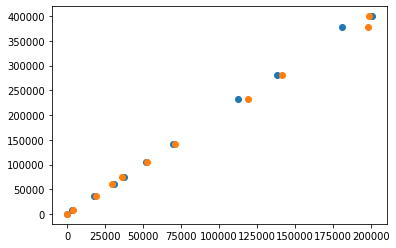

In [114]:
# Finalmente para saber hacer un pronostico del comportamiento de las variables, generamos una simulacion con la cual podamos su crecimiento o decrecimiento  
import matplotlib.pyplot as plt 
import seaborn as sns
#plt.pie(x=total_gen_edad.Femenino,labels=total_gen_edad[0]) 
plt.scatter(x=total_gen_edad.Masculino,y=total_gen_edad.Total)
plt.scatter(x=total_gen_edad.Femenino,y=total_gen_edad.Total)
#sns.displot(df.total_gen_edad['Masculino'])
#sns.displot(df.total_gen_edad['Femenino'])
plt.show()

(-0.14344735399513214, 1.143447353995132)

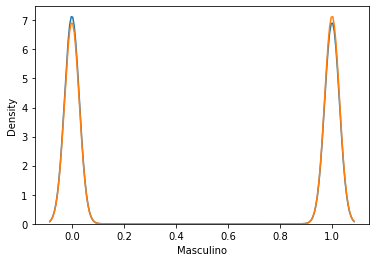

In [115]:
# con el paquete seaborn a que clase de distribucion responde la variable genero en su valores masculino y femenino,
# Como podemos observar no es una variable recta sino una campana de gauss
# por lo que encontramos que responde a una distribucion de probabilidad normal.
# lo cual dificulta poder estudiar esta variable por medio de regresiones lineales.
# Sin embargo esta variable tambien la estudiaremos en el statsmodel, para poder comprobar la hipotesis que hemos generado.
# Ho--> la variable si sirve para determinar la muerte por coronavirus
# Ha--> al ser una variable con comportamiento normal, no sirve para determinar las causales de la muerte. 
sns.kdeplot(df_gen_edad['Masculino'])
sns.kdeplot(df_gen_edad['Femenino'])
plt.xlim()

In [116]:
df_gen_edad.to_csv('DataClustering.csv',index=False)
df_contagio.to_csv('ReporteContagios.csv',index=False)
df_ubicacion.to_csv('DataUbicacionCaso.csv',index=False)
df_estado.to_csv('DataEstadosPacientes.csv',index=False)
df_tiporecuperacion.to_csv('DataTipoRecuperacion.csv',index=False)
df_TiempoDiagnostico.to_csv('TiempoDiagnosticos.csv',index=False)
sr_WeekDiag.to_csv('SerieTemporalSemanal.csv',index=False)
sr_MonthDiag.to_csv('SerieTemporalMensual.csv',index=False)
df_TiempoDiagnostico.to_csv('DataTiemposDiagnosticos.csv',index=False)
df_tiempos.to_csv('DataTiemposSintomaticos.csv',index=False)
sr_diferidos.to_csv('DataTiemposSeriealesDiferidos.csv',index=False)
sr_diagn.to_csv('SeriesTemporalesDiagnosticos.csv',index=False)
sr_notif.to_csv('SeriesTemporalesNotificacion.csv',index=False)
sr_dead.to_csv('SeriesTemporalesMuertes.csv',index=False)
sr_reporte.to_csv('SeriesTemporalesReportes.csv',index=False)
df_test.to_csv('DataPruebas.csv',index=False)


In [117]:
total_recuperados.to_excel('TotalConsolidados.xlsx',index=False)
total_columna.to_excel('PromediosColumnas.xlsx',index=False)
total_contagios.to_excel('ConsolidadoContagios.xlsx',index=False)
#total_ubicacion.to_Excel('UbicacionCasos.xlsx',index=False)
total_columnaEstado.to_excel('ConsolidadoEstadosEnfermos.xlsx',index=False)
total_estado.to_excel('ConsolidadoEnfermos.xlsx',index=False)
total_columnaTipo.to_excel('TotalTipo.xlsx',index=False)
total_tipoRecuperacion.to_excel('ConsolidadoRecuperaciones.xlsx',index=False)
df_DifusionViral.to_excel('DataDifusionViral.xlsx',index=False)
df_InicioSintomas.to_excel('SerialesSintomatologicos.xlsx',index=False)
data_WeekDiag.to_excel('SerializacionSemanalDiagnostico.xlsx',index=False)
df_defuncion.to_excel('DataDefunciones.xlsx',index=False)
total_edad.to_excel('TotalxEdades.xlsx',index=False)
